In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Avoiding warnings

import warnings
warnings.filterwarnings("ignore")

# 1. Data Preparation (cleaning and engineering)

## 1.1. Dublin Bikes

First we will loop through the files in order to concatenate the 12 complementary files into a single dataframe for the whole year of 2023.
Dataset available at: 

Dataset available at: https://data.smartdublin.ie/dataset/dublinbikes-api


Font: https://medium.com/@nawazmohtashim/method-to-merge-csv-files-in-python-8b0f16550e0b

In [2]:
# Listing the files and sorting them by name in the dublin_data folder so they do not have to be typed one by one. Adapted from: https://stevenhough.medium.com/how-to-easily-list-all-files-in-a-folder-using-python-3-ee06004c6316

folder_path = '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data'

file_list = sorted([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(file_list)

['.DS_Store', 'Dublinbike_historical_data_2022.csv', 'dublinbike-historical-data-2022-01.csv', 'dublinbike-historical-data-2022-02.csv', 'dublinbike-historical-data-2022-03.csv', 'dublinbike-historical-data-2022-04.csv', 'dublinbike-historical-data-2022-05.csv', 'dublinbike-historical-data-2022-06.csv', 'dublinbike-historical-data-2022-07.csv', 'dublinbike-historical-data-2022-08.csv', 'dublinbike-historical-data-2022-09.csv', 'dublinbike-historical-data-2022-10.csv', 'dublinbike-historical-data-2022-11.csv', 'dublinbike-historical-data-2022-12.csv']


In [3]:
# Creating a list with the files.

months_dfs = ['/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-01.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-02.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-03.csv', 
              '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-04.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-05.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-06.csv',
              '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-07.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-08.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-09.csv',
              '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-10.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-11.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/dublinbike-historical-data-2022-12.csv']

In [4]:
df_dublin = pd.DataFrame()

# For loop for merging data
for monthsdfs in months_dfs:
    df = pd.read_csv(monthsdfs)
    df_dublin = pd.concat([df_dublin, df], ignore_index=True)

# Saving a new .csv file with the merged data
df_dublin.to_csv('Dublinbike_historical_data_2022.csv', index=False)

In [5]:
df_dublin = pd.read_csv('/Users/macbook/Desktop/MSC_DA_Repeat/dublin_data/Dublinbike_historical_data_2022.csv')

Inspect the data.

In [6]:
df_dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950289 entries, 0 to 1950288
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   STATION ID             int64  
 1   TIME                   object 
 2   LAST UPDATED           object 
 3   NAME                   object 
 4   BIKE_STANDS            int64  
 5   AVAILABLE_BIKE_STANDS  int64  
 6   AVAILABLE_BIKES        int64  
 7   STATUS                 object 
 8   ADDRESS                object 
 9   LATITUDE               float64
 10  LONGITUDE              float64
dtypes: float64(2), int64(4), object(5)
memory usage: 163.7+ MB


In [7]:
df_dublin.tail(3)

STATION ID                 TIME         LAST UPDATED  \
1950286         115  2022-12-31 23:30:02  2022-12-31 23:29:17   
1950287         116  2022-12-31 23:30:02  2022-12-31 23:26:30   
1950288         117  2022-12-31 23:30:02  2022-12-31 23:24:36   

                      NAME  BIKE_STANDS  AVAILABLE_BIKE_STANDS  \
1950286   KILLARNEY STREET           30                     24   
1950287         BROADSTONE           30                     28   
1950288  HANOVER QUAY EAST           40                     37   

         AVAILABLE_BIKES STATUS            ADDRESS  LATITUDE  LONGITUDE  
1950286                6   OPEN   Killarney Street   53.3548   -6.24758  
1950287                2   OPEN         Broadstone   53.3547   -6.27231  
1950288                3   OPEN  Hanover Quay East   53.3437   -6.23175

Handling missing data.

In [8]:
df_dublin.isnull().sum()

STATION ID               0
TIME                     0
LAST UPDATED             0
NAME                     0
BIKE_STANDS              0
AVAILABLE_BIKE_STANDS    0
AVAILABLE_BIKES          0
STATUS                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
dtype: int64

Filtering the dataset by status.

In [9]:
# Checking unique statuses in 'STATUS' since we are only using stations that are open.

statuses_status = df_dublin['STATUS'].unique()
status_numbers = df_dublin['STATUS'].value_counts()

statuses_status, status_numbers

(array(['OPEN', 'CLOSED'], dtype=object),
 STATUS
 OPEN      1948271
 CLOSED       2018
 Name: count, dtype: int64)

In [10]:
# Filtering the dataset to only 'OPEN' statuses.

df_dublin = df_dublin[df_dublin['STATUS'] == 'OPEN']

Datatype transforming.

In [11]:
# Tranforming the column 'TIME' to datetime format.

df_dublin['TIME']= pd.to_datetime(df_dublin['TIME'])

Dropping, renaming and detecting duplicates.

In [12]:
# Dropping redundant / unecessary columns.

drop_column_dublin_1 = ['LAST UPDATED','ADDRESS', 'STATUS']
df_dublin = df_dublin.drop(columns = drop_column_dublin_1)

In [13]:
# Renaming columns for better vizualisation.

df_dublin.rename(columns={'STATION ID': 'station_id','TIME': 'time', 'NAME': 'station', 'BIKE_STANDS': 'n_stands',
                            'AVAILABLE_BIKE_STANDS': 'available_stands','AVAILABLE_BIKES': 'available_bikes',
                         'LATITUDE': 'lat', 'LONGITUDE': 'long' }, inplace=True)

In [14]:
# Detecting duplicates (It is very unlikely there are duplicates due to the origin of the data, but it will be performed just in case).
# If it is 'False', there are no duplicated rows in the dataset.

dupli = df_dublin.duplicated().any()

print(f'Are there any duplicated rows in the whole dataset? {dupli}')

Are there any duplicated rows in the whole dataset? False


In [15]:
df_dublin.head(5)

station_id                time             station  n_stands  \
0           2 2022-01-01 00:00:04  BLESSINGTON STREET        20   
1           3 2022-01-01 00:00:04       BOLTON STREET        20   
2           4 2022-01-01 00:00:04        GREEK STREET        20   
3           5 2022-01-01 00:00:04    CHARLEMONT PLACE        40   
4           6 2022-01-01 00:00:04  CHRISTCHURCH PLACE        20   

   available_stands  available_bikes      lat     long  
0                10               10  53.3568 -6.26814  
1                19                1  53.3512 -6.26986  
2                 9               11  53.3469 -6.27298  
3                17               23  53.3307 -6.26018  
4                13                7  53.3434 -6.27012

### Data engineering for specific data and creation of lighter datasets for diferent analysis.

Dataset: Number of trips

In [16]:
# Sorting rows by station_id and time.

dublin_filtered_station_time = df_dublin.sort_values(by=['station_id', 'time'])

In [17]:
# Calculating number of trips per row (ended and started).
# Obs: There is a slight modifycation in the lambda function since 'ended' and 'started'(lambda x: -x in
# comparison to lambda x: x) as the number of the current available bikes / available stands subtracted from the previous number will 
# dictate if it is a starting or ending trip. (AS + / AB - = Trips started; AS - / AB + = Trips ended)

dublin_filtered_station_time['trips_started'] = dublin_filtered_station_time.groupby('station_id')['available_bikes'].diff().fillna(0)
dublin_filtered_station_time['trips_started'] = dublin_filtered_station_time['trips_started'].apply(lambda x: -x if x < 0 else 0)

dublin_filtered_station_time['trips_ended'] = dublin_filtered_station_time.groupby('station_id')['available_bikes'].diff().fillna(0)
dublin_filtered_station_time['trips_ended'] = dublin_filtered_station_time['trips_ended'].apply(lambda x: x if x > 0 else 0)

dublin_filtered_station_time['total_trips_per_station'] = dublin_filtered_station_time ['trips_started']+dublin_filtered_station_time['trips_ended']


In [18]:
dublin_filtered_station_time.head()

station_id                time        station  n_stands  \
614868           1 2022-04-27 13:00:02  CLARENDON ROW        31   
614980           1 2022-04-27 13:30:02  CLARENDON ROW        31   
615092           1 2022-04-27 14:00:02  CLARENDON ROW        31   
615204           1 2022-04-27 14:30:02  CLARENDON ROW        31   
615316           1 2022-04-27 15:00:02  CLARENDON ROW        31   

        available_stands  available_bikes      lat    long  trips_started  \
614868                27                0  53.3409 -6.2625            0.0   
614980                27                0  53.3409 -6.2625            0.0   
615092                27                0  53.3409 -6.2625            0.0   
615204                 0                0  53.3409 -6.2625            0.0   
615316                 0                0  53.3409 -6.2625            0.0   

        trips_ended  total_trips_per_station  
614868          0.0                      0.0  
614980          0.0                      0.0  
615092          0.0                      0.0  
615204          0.0                      0.0  
615316          0.0                      0.0

In [19]:
# Calculating totals

dublin_total_trips = dublin_filtered_station_time.groupby(['station_id', 'station'])[['trips_started', 'trips_ended', 'total_trips_per_station']].sum().reset_index()
dublin_total_trips = dublin_filtered_station_time.groupby(['station_id', 'station'])[['trips_started', 'trips_ended', 'total_trips_per_station']].sum().reset_index()



In [20]:
# Transforming columns datatypes


dublin_total_trips['trips_started'] = dublin_total_trips['trips_started'].astype(int)
dublin_total_trips['trips_ended'] = dublin_total_trips['trips_ended'].astype(int)
dublin_total_trips['total_trips_per_station'] = dublin_total_trips['total_trips_per_station'].astype(int)


In [21]:
dublin_total_trips.tail()

station_id                     station  trips_started  trips_ended  \
110         114       WILTON TERRACE (PARK)          13717        13711   
111         115            KILLARNEY STREET          10800        10780   
112         116                  BROADSTONE           5015         5008   
113         117           HANOVER QUAY EAST           4691         4689   
114         507  ORIEL STREET TEST TERMINAL              0            0   

     total_trips_per_station  
110                    27428  
111                    21580  
112                    10023  
113                     9380  
114                        0

In [22]:
# Removing rows with 0 trips.

dublin_total_trips = dublin_total_trips[dublin_total_trips['total_trips_per_station']>0]

In [23]:
dublin_total_trips.tail()

station_id                station  trips_started  trips_ended  \
109         113   MERRION SQUARE SOUTH           4242         4254   
110         114  WILTON TERRACE (PARK)          13717        13711   
111         115       KILLARNEY STREET          10800        10780   
112         116             BROADSTONE           5015         5008   
113         117      HANOVER QUAY EAST           4691         4689   

     total_trips_per_station  
109                     8496  
110                    27428  
111                    21580  
112                    10023  
113                     9380

Dataset: Total trips per specific time.

In [24]:
# Filtering data

dublin_trips_per_time = dublin_filtered_station_time[['station_id', 'station', 'time', 'total_trips_per_station']]

In [25]:
# Creating columns for 'weeday' and 'month'

dublin_trips_per_time.loc[:, 'weekday'] = dublin_trips_per_time['time'].dt.isocalendar().day
dublin_trips_per_time.loc[:, 'month'] = dublin_trips_per_time['time'].dt.month
dublin_trips_per_time.loc[:, 'week'] = dublin_trips_per_time['time'].dt.isocalendar().week
dublin_trips_per_time.loc[:, 'day'] = dublin_trips_per_time['time'].dt.day
dublin_trips_per_time.loc[:, 'hour'] = dublin_trips_per_time['time'].dt.hour

dublin_trips_per_time = dublin_trips_per_time[['station_id', 'station', 'time','weekday', 'month', 'week', 'day', 'hour', 'total_trips_per_station']]

In [26]:
# Transforming columns datatype

dublin_trips_per_time['total_trips_per_station'] = dublin_trips_per_time['total_trips_per_station'].astype(int)

In [27]:
# Selecting columns with trips.

dublin_trips_per_time = dublin_trips_per_time[dublin_trips_per_time['total_trips_per_station']>0]

In [28]:
dublin_trips_per_time.tail()

station_id            station                time  weekday  month  \
1948819         117  HANOVER QUAY EAST 2022-12-31 17:00:03        6     12   
1949271         117  HANOVER QUAY EAST 2022-12-31 19:00:02        6     12   
1949384         117  HANOVER QUAY EAST 2022-12-31 19:30:02        6     12   
1949723         117  HANOVER QUAY EAST 2022-12-31 21:00:02        6     12   
1950175         117  HANOVER QUAY EAST 2022-12-31 23:00:03        6     12   

         week  day  hour  total_trips_per_station  
1948819    52   31    17                        1  
1949271    52   31    19                        2  
1949384    52   31    19                        2  
1949723    52   31    21                        1  
1950175    52   31    23                        1

In [29]:
# Saving a new .csv file with the merged data
#dublin_trips_per_time.to_csv('dublin_trips_per_time.csv', index=False)

Dataset: Stations' locations

In [30]:
dublin_station_location = df_dublin[['station_id', 'station', 'lat', 'long']]

In [31]:
dublin_station_location.tail(10)

station_id                            station      lat     long
1950279         108                      AVONDALE ROAD  53.3594 -6.27614
1950280         109            BUCKINGHAM STREET LOWER  53.3533 -6.24932
1950281         110                  PHIBSBOROUGH ROAD  53.3563 -6.27372
1950282         111               MOUNTJOY SQUARE EAST  53.3567 -6.25636
1950283         112  NORTH CIRCULAR ROAD (O'CONNELL'S)  53.3578 -6.25156
1950284         113               MERRION SQUARE SOUTH  53.3386 -6.24861
1950285         114              WILTON TERRACE (PARK)  53.3337 -6.24834
1950286         115                   KILLARNEY STREET  53.3548 -6.24758
1950287         116                         BROADSTONE  53.3547 -6.27231
1950288         117                  HANOVER QUAY EAST  53.3437 -6.23175

## 1.2. Boston Blue Bikes

The same process for concatenating files will be used for the following Boston Bikes datasets.

Font: https://medium.com/@nawazmohtashim/method-to-merge-csv-files-in-python-8b0f16550e0b

In [32]:
# Listing the files and sorting them by name in the boston_data folder so they do not have to be typed one by one. Adapted from: https://stevenhough.medium.com/how-to-easily-list-all-files-in-a-folder-using-python-3-ee06004c6316

folder_path = '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data'

file_list = sorted([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(file_list)

['.DS_Store', '2022-bluebikes-tripdata.csv', '202201-bluebikes-tripdata.csv', '202202-bluebikes-tripdata.csv', '202203-bluebikes-tripdata.csv', '202204-bluebikes-tripdata.csv', '202205-bluebikes-tripdata.csv', '202206-bluebikes-tripdata.csv', '202207-bluebikes-tripdata.csv', '202208-bluebikes-tripdata.csv', '202209-bluebikes-tripdata.csv', '202210-bluebikes-tripdata.csv', '202211-bluebikes-tripdata.csv', '202212-bluebikes-tripdata.csv']


Creating a list with the files.

In [33]:
boston_months_dfs = ['/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202201-bluebikes-tripdata.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202202-bluebikes-tripdata.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202203-bluebikes-tripdata.csv',
                     '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202204-bluebikes-tripdata.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202205-bluebikes-tripdata.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202206-bluebikes-tripdata.csv', 
                     '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202207-bluebikes-tripdata.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202208-bluebikes-tripdata.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202209-bluebikes-tripdata.csv', 
                     '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202210-bluebikes-tripdata.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202211-bluebikes-tripdata.csv', '/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/202212-bluebikes-tripdata.csv']

In [34]:
df_boston = pd.DataFrame()

# For loop for merging data

for boston_months_dfs in boston_months_dfs:
    df = pd.read_csv(boston_months_dfs)
    df_boston = pd.concat([df_boston, df], ignore_index=True)

# Saving a new .csv file with the merged data

df_boston.to_csv('/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/2022-bluebikes-tripdata.csv', index=False)

In [35]:
df_boston = pd.read_csv('/Users/macbook/Desktop/MSC_DA_Repeat/boston_data/2022-bluebikes-tripdata.csv')

Inspect data.

In [36]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757281 entries, 0 to 3757280
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  postal code              object 
dtypes: float64(4), int64(4), object(6)
memory usage: 401.3+ MB


In [37]:
df_boston.tail(3)

tripduration                 starttime                  stoptime  \
3757278           958  2022-12-31 23:53:42.9690  2023-01-01 00:09:41.0970   
3757279           995  2022-12-31 23:58:11.1980  2023-01-01 00:14:46.7870   
3757280           969  2022-12-31 23:58:30.1460  2023-01-01 00:14:39.4400   

         start station id           start station name  \
3757278                49      Stuart St at Charles St   
3757279                39  Washington St at Rutland St   
3757280                39  Washington St at Rutland St   

         start station latitude  start station longitude  end station id  \
3757278               42.351146               -71.066289              16   
3757279               42.338515               -71.074041              43   
3757280               42.338515               -71.074041              43   

                                    end station name  end station latitude  \
3757278  Back Bay T Stop - Dartmouth St at Stuart St             42.348074   
3757279                  Rowes Wharf at Atlantic Ave             42.357143   
3757280                  Rowes Wharf at Atlantic Ave             42.357143   

         end station longitude  bikeid    usertype postal code  
3757278             -71.076570    7898    Customer       02141  
3757279             -71.050699    8330  Subscriber       02116  
3757280             -71.050699    3886  Subscriber         NaN

Handling missing data.

In [38]:
# Since only postal code has null values and it is an irrelevant variable for the analysis, it will be dropped latter.

df_boston.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
postal code                465637
dtype: int64

Transforming Dtypes

In [39]:
df_boston['starttime'] = pd.to_datetime(df_boston['starttime'])
df_boston['stoptime'] = pd.to_datetime(df_boston['stoptime'])

Dropping, renaming, and detecting duplicates.

In [40]:
# Dropping redundant / unecessary columns.

drop_column_boston_1 = ['tripduration', 'usertype', 'postal code', 'bikeid'] 
df_boston = df_boston.drop(columns = drop_column_boston_1)

In [41]:
# Renaming columns for better vizualisation.

df_boston.rename(columns={ 'start station id': 'start_station_id', 'start station name': 'start_station', 'start station id': 'start_station_id', 
                          'start station latitude': 'start_station_lat', 'start station longitude': 'start_station_long',
                          
                         'end station id': 'end_station_id', 'end station name': 'end_station', 'end station id': 'end_station_id', 
                          'end station latitude': 'end_station_lat', 'end station longitude': 'end_station_long'}, inplace=True)

In [42]:
df_boston.head()

starttime                stoptime  start_station_id  \
0 2022-01-01 00:00:25.166 2022-01-01 00:10:22.192               178   
1 2022-01-01 00:00:40.430 2022-01-01 00:07:32.198               189   
2 2022-01-01 00:00:54.818 2022-01-01 00:08:51.668                94   
3 2022-01-01 00:01:01.608 2022-01-01 00:08:48.235                94   
4 2022-01-01 00:01:06.052 2022-01-01 00:13:38.230                19   

                     start_station  start_station_lat  start_station_long  \
0  MIT Pacific St at Purrington St          42.359573          -71.101295   
1                        Kendall T          42.362428          -71.084955   
2             Main St at Austin St          42.375603          -71.064608   
3             Main St at Austin St          42.375603          -71.064608   
4            Park Dr at Buswell St          42.347241          -71.105301   

   end_station_id                                        end_station  \
0              74                Harvard Square at Mass Ave/ Dunster   
1             178                    MIT Pacific St at Purrington St   
2             356                              Charlestown Navy Yard   
3             356                              Charlestown Navy Yard   
4              41  Packard's Corner - Commonwealth Ave at Brighto...   

   end_station_lat  end_station_long  
0        42.373268        -71.118579  
1        42.359573        -71.101295  
2        42.374125        -71.054812  
3        42.374125        -71.054812  
4        42.352261        -71.123831

### Data engineering for specific data and creation of lighter datasets for diferent analysis.

Dataset: number of trips

In [43]:
# Calculating the number of trips starting and ending at each station.

trips_started = df_boston.groupby(['start_station_id', 'start_station']).size().reset_index(name='trips_started')
trips_ended = df_boston.groupby(['end_station_id', 'end_station']).size().reset_index(name='trips_ended')

In [44]:
# Merging and getting the total ammount of trips per station.

boston_total_trips = pd.merge(trips_started, trips_ended, left_on = 'start_station_id', right_on = 'end_station_id')

In [45]:
boston_total_trips.head()

start_station_id                                      start_station  \
0                 1                              18 Dorrance Warehouse   
1                 3  Colleges of the Fenway - Fenway at Avenue Loui...   
2                 4                        Tremont St at E Berkeley St   
3                 5        Northeastern University - North Parking Lot   
4                 6                             Cambridge St at Joy St   

   trips_started  end_station_id  \
0             37               1   
1           9957               3   
2          14900               4   
3          11861               5   
4          20750               6   

                                         end_station  trips_ended  
0                              18 Dorrance Warehouse          646  
1  Colleges of the Fenway - Fenway at Avenue Loui...        10291  
2                        Tremont St at E Berkeley St        15318  
3        Northeastern University - North Parking Lot        12297  
4                             Cambridge St at Joy St        20229

In [46]:
# Cleaning and renaming.

boston_total_trips.rename(columns={'start_station_id': 'station_id', 'start_station': 'station_name'}, inplace=True)
boston_total_trips = boston_total_trips.drop(columns = ['end_station_id', 'end_station'])

In [47]:
# Adding total.

boston_total_trips['total_trips']= boston_total_trips['trips_started']+boston_total_trips['trips_ended']


In [48]:
boston_total_trips.head()

station_id                                       station_name  \
0           1                              18 Dorrance Warehouse   
1           3  Colleges of the Fenway - Fenway at Avenue Loui...   
2           4                        Tremont St at E Berkeley St   
3           5        Northeastern University - North Parking Lot   
4           6                             Cambridge St at Joy St   

   trips_started  trips_ended  total_trips  
0             37          646          683  
1           9957        10291        20248  
2          14900        15318        30218  
3          11861        12297        24158  
4          20750        20229        40979

Dataset: Number of trips per time.

In [49]:
# In order to have one trip per row, the dataset was split.

boston_start_df = df_boston[['starttime', 'start_station_id', 'start_station']]
boston_start_df.columns=['time', 'station_id', 'station']

boston_end_df = df_boston[['stoptime', 'end_station_id', 'end_station']]
boston_end_df.columns=['time', 'station_id', 'station']

boston_trips_per_time = pd.concat([boston_start_df, boston_end_df])

boston_trips_per_time['weekday'] = boston_trips_per_time['time'].dt.isocalendar().day
boston_trips_per_time['month'] = boston_trips_per_time['time'].dt.month

boston_trips_per_time = boston_trips_per_time.groupby(['station_id', 'station', 'time']).size().reset_index(name='total_trips_per_station')

In [50]:
boston_trips_per_time.head()

station_id                station                    time  \
0           1  18 Dorrance Warehouse 2022-01-08 18:31:41.878   
1           1  18 Dorrance Warehouse 2022-01-13 16:36:44.834   
2           1  18 Dorrance Warehouse 2022-01-17 17:48:23.892   
3           1  18 Dorrance Warehouse 2022-02-11 14:15:49.555   
4           1  18 Dorrance Warehouse 2022-02-14 19:28:55.591   

   total_trips_per_station  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1

In [51]:
# Creating columns for 'weekday' and 'month'

boston_trips_per_time.loc[:, 'weekday'] = boston_trips_per_time['time'].dt.isocalendar().day
boston_trips_per_time.loc[:, 'month'] = boston_trips_per_time['time'].dt.month

boston_trips_per_time = boston_trips_per_time[['station_id', 'station', 'time','weekday', 'month', 'total_trips_per_station']]

In [52]:
boston_trips_per_time.head()

station_id                station                    time  weekday  month  \
0           1  18 Dorrance Warehouse 2022-01-08 18:31:41.878        6      1   
1           1  18 Dorrance Warehouse 2022-01-13 16:36:44.834        4      1   
2           1  18 Dorrance Warehouse 2022-01-17 17:48:23.892        1      1   
3           1  18 Dorrance Warehouse 2022-02-11 14:15:49.555        5      2   
4           1  18 Dorrance Warehouse 2022-02-14 19:28:55.591        1      2   

   total_trips_per_station  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1

Dataset: Stations locations

In [53]:
# Separating start and end stations and renaming columns.

start_stations = df_boston[['start_station_id', 'start_station', 'start_station_lat', 'start_station_long']]
start_stations.columns = ['station_id', 'station', 'lat', 'long']

end_stations = df_boston[['end_station_id', 'end_station', 'end_station_lat', 'end_station_long']]
end_stations.columns = ['station_id', 'station', 'lat', 'long']

# Concatenating datasets.

boston_station_location = pd.concat([start_stations, end_stations])

# Dropping duplicates.

boston_station_location = boston_station_location.drop_duplicates().reset_index(drop=True)

In [54]:
boston_station_location = boston_station_location.sort_values(by='station_id').reset_index(drop=True)

In [55]:
boston_station_location.head(5)

station_id                                            station        lat  \
0           1                              18 Dorrance Warehouse  42.387151   
1           3  Colleges of the Fenway - Fenway at Avenue Loui...  42.340115   
2           4                        Tremont St at E Berkeley St  42.345392   
3           5        Northeastern University - North Parking Lot  42.341814   
4           6                             Cambridge St at Joy St  42.361257   

        long  
0 -71.075978  
1 -71.100619  
2 -71.069616  
3 -71.090179  
4 -71.065287

In [56]:
# Saving a new .csv file with the merged data
boston_station_location.to_csv('boston_station_location.csv', index=False)

# 2. EDA (Exploratory Data Analysis)

## 2.1. DublinBikes and BlueBikes Boston: Geographical Distribution of Stations

In [57]:
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

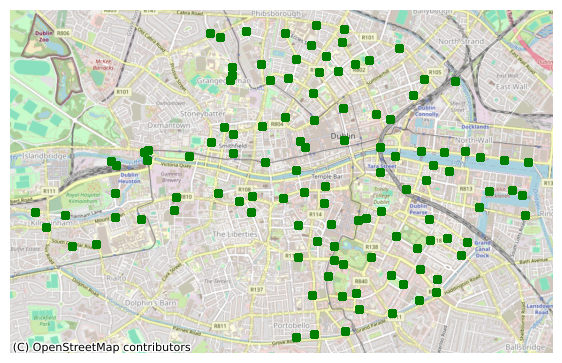

In [58]:
import geopandas as gpd
import contextily as ctx

# GeoDataFrame creation
gdf = gpd.GeoDataFrame(dublin_station_location, geometry=gpd.points_from_xy(dublin_station_location['long'], dublin_station_location['lat']))

# Set coordinate reference system to WGS84 (EPSG:4326) and convert to Web Mercator (EPSG:3857)
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=3857)

# Plot the map
fig, ax = plt.subplots(figsize=(7, 7))
gdf.plot(ax=ax, marker='o', color='green', markersize=30)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Remove axis for a cleaner look
ax.set_axis_off()

plt.show()

# Font: Adapted from https://medium.com/@haniszulaikha/starter-tutorial-on-geopandas-d3ede5cc16e9; https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html


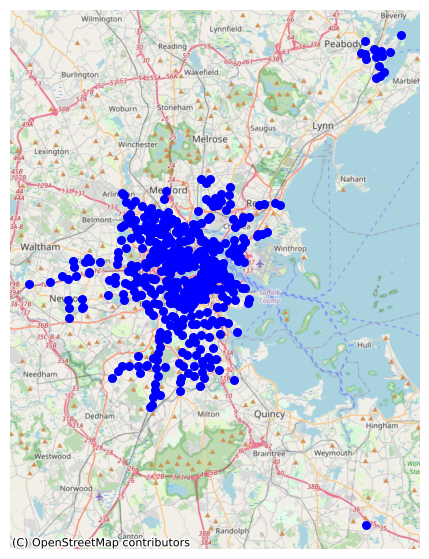

In [59]:
# GeoDataFrame creation
gdf = gpd.GeoDataFrame(boston_station_location, geometry=gpd.points_from_xy(boston_station_location['long'], boston_station_location['lat']))

# Set coordinate reference system to WGS84 (EPSG:4326) and convert to Web Mercator (EPSG:3857)
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=3857)

# Plot the map
fig, ax = plt.subplots(figsize=(7, 7))
gdf.plot(ax=ax, marker='o', color='blue', markersize=30)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Remove axis for a cleaner look
ax.set_axis_off()

plt.show()

# Font: Adapted from https://medium.com/@haniszulaikha/starter-tutorial-on-geopandas-d3ede5cc16e9; https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html


### 2.2. Total Number of Trips per Bike Scheme in the year of 2022

In [60]:
dublin_total_trips_started = dublin_total_trips['trips_started'].sum()
dublin_total_trips_ended = dublin_total_trips['trips_ended'].sum()
dublin_total_trips_total = dublin_total_trips['total_trips_per_station'].sum()

print('Total trips started in the year of 2022: ', dublin_total_trips_started)
print('Total trips ended in the year of 2022: ', dublin_total_trips_ended)
print('Total trips in the year of 2022: ', dublin_total_trips_total)

Total trips started in the year of 2022:  1059990
Total trips ended in the year of 2022:  1059949
Total trips in the year of 2022:  2119939


In [61]:
boston_total_trips_started = boston_total_trips['trips_started'].sum()
boston_total_trips_ended = boston_total_trips['trips_ended'].sum()
boston_total_trips_total = boston_total_trips['total_trips'].sum()

print('Total trips started in the year of 2022: ', boston_total_trips_started)
print('Total trips ended in the year of 2022: ', boston_total_trips_ended)
print('Total trips in the year of 2022: ', boston_total_trips_total)

Total trips started in the year of 2022:  3793449
Total trips ended in the year of 2022:  3794515
Total trips in the year of 2022:  7587964


### 2.2.1. The 10 most / least utilized bike stations in the year of 2022.

In [62]:
# Since we have a large number of stations per bike scheme, we will plot the top and bottom 10 dock station for each datset.

dublin_top_10_usage = dublin_total_trips.nlargest(10, 'total_trips_per_station')
dublin_bottom_10_usage = dublin_total_trips.nsmallest(10, 'total_trips_per_station')

boston_top_10_usage = boston_total_trips.nlargest(10, 'total_trips')
boston_bottom_10_usage = boston_total_trips.nsmallest(10, 'total_trips')


DublinBikes: Top 10 most utilized docks.

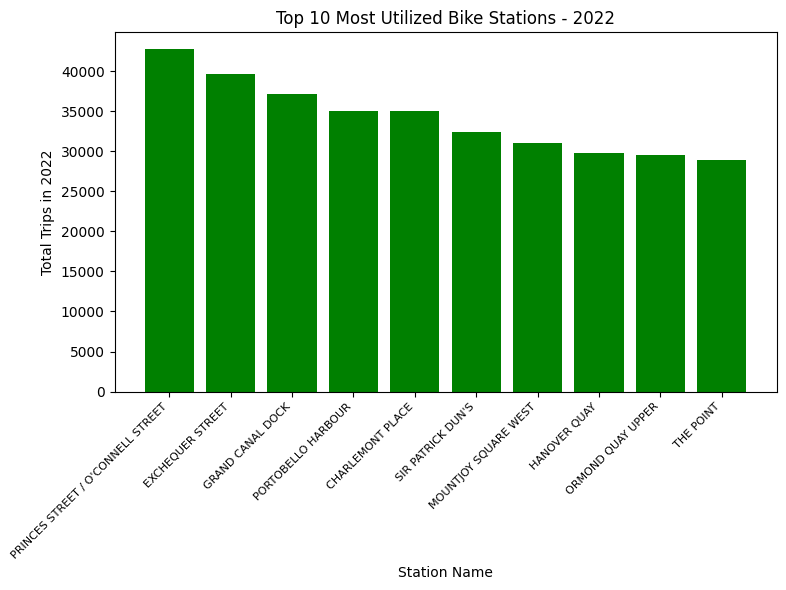

In [63]:
plt.figure(figsize=(8, 6))
plt.bar(dublin_top_10_usage['station'], dublin_top_10_usage['total_trips_per_station'], color='green')
plt.xlabel('Station Name')
plt.ylabel('Total Trips in 2022')
plt.title('Top 10 Most Utilized Bike Stations - 2022')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

DublinBikes: Top 10 least utilized docks.

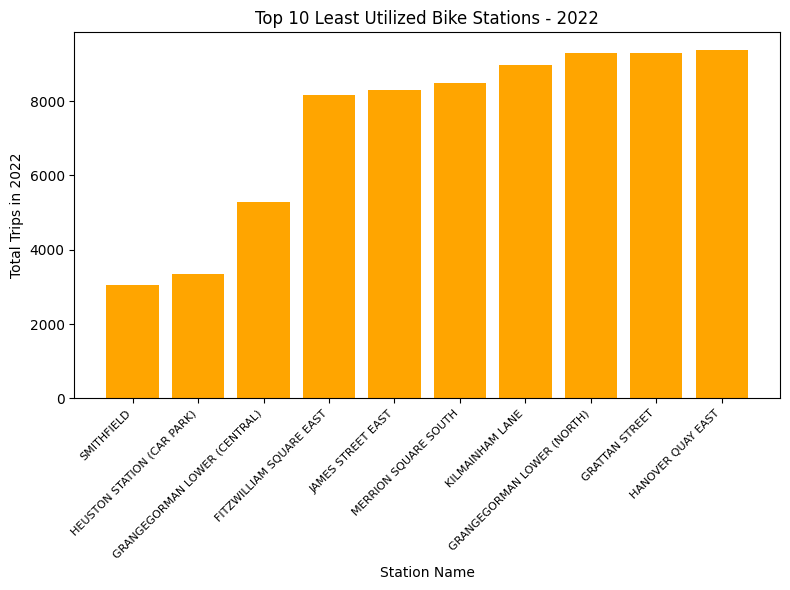

In [64]:
plt.figure(figsize=(8, 6))
plt.bar(dublin_bottom_10_usage['station'], dublin_bottom_10_usage['total_trips_per_station'], color='orange')
plt.xlabel('Station Name')
plt.ylabel('Total Trips in 2022')
plt.title('Top 10 Least Utilized Bike Stations - 2022')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

 BlueBikes Boston: Top 10 most utilized docks.

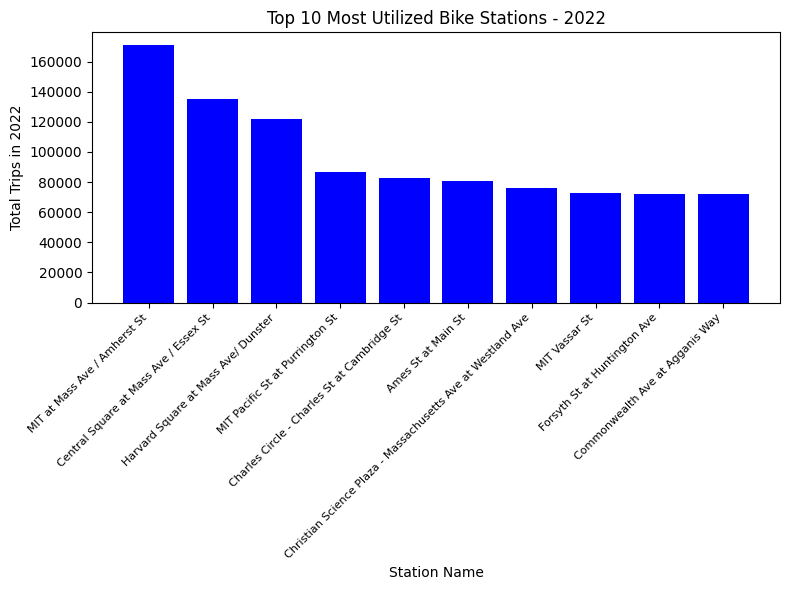

In [65]:
plt.figure(figsize=(8, 6))
plt.bar(boston_top_10_usage['station_name'], boston_top_10_usage['total_trips'], color='blue')
plt.xlabel('Station Name')
plt.ylabel('Total Trips in 2022')
plt.title('Top 10 Most Utilized Bike Stations - 2022')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

 BlueBikes Boston: Top 10 least utilized docks.

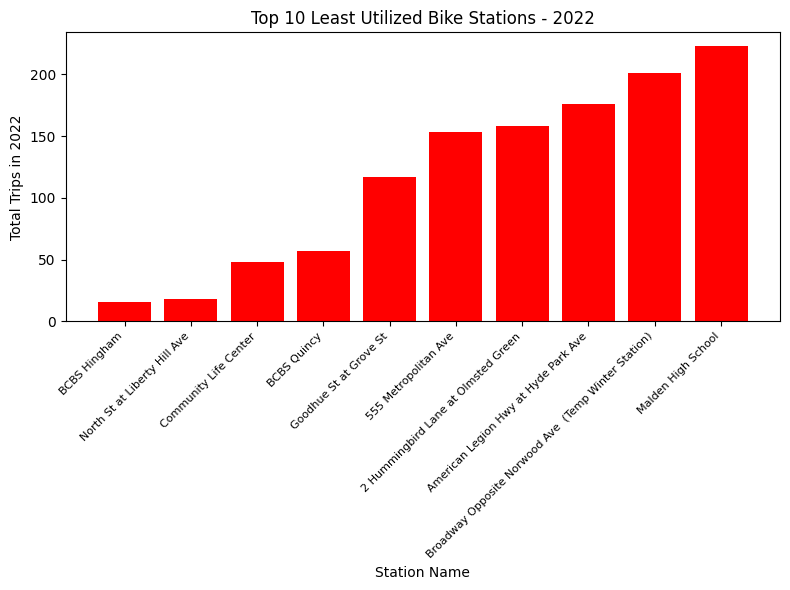

In [149]:
plt.figure(figsize=(8, 6))
plt.bar(boston_bottom_10_usage['station_name'], boston_bottom_10_usage['total_trips'], color='red')
plt.xlabel('Station Name')
plt.ylabel('Total Trips in 2022')
plt.title('Top 10 Least Utilized Bike Stations - 2022')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### 2.2.2 Number of trips by weekday and month.

### Weekdays

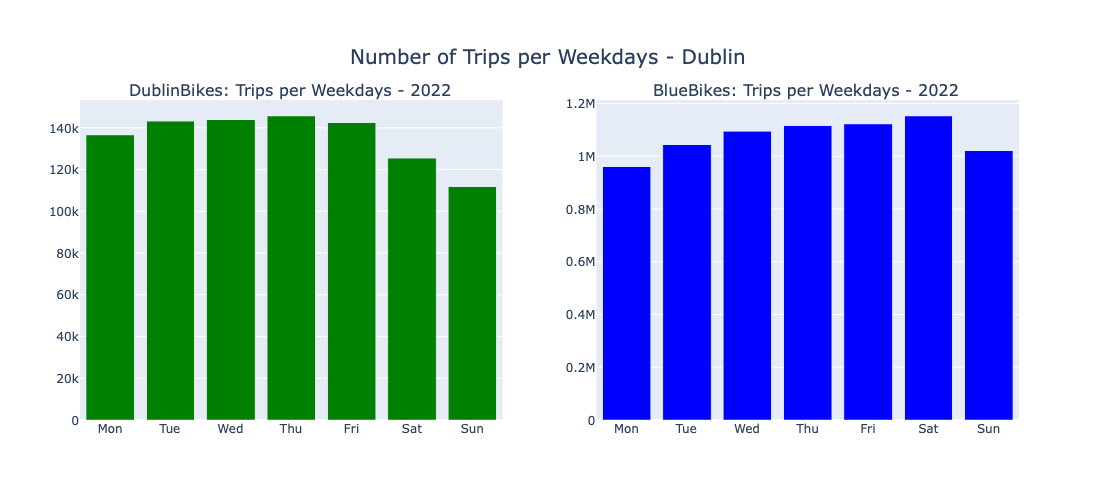

In [150]:
#Selecting dataset and creating number of trips.

dublin_trips_per_weekday = dublin_trips_per_time.groupby('weekday').size().reset_index(name='number_of_trips')
boston_trips_per_weekday = boston_trips_per_time.groupby('weekday').size().reset_index(name='number_of_trips')

# Transforming numbers into weekday names.
w_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Takes all values from the 'weekday' column and substitutes them for the dictionary values.
dublin_trips_per_weekday['weekday_name'] = dublin_trips_per_weekday['weekday'].apply(lambda x: w_names[x-1])
boston_trips_per_weekday['weekday_name'] = boston_trips_per_weekday['weekday'].apply(lambda x: w_names[x-1]) 


fig_weekday = make_subplots(rows=1, cols=2, subplot_titles=('DublinBikes: Trips per Weekdays - 2022', 'BlueBikes: Trips per Weekdays - 2022'))
                   

dublin_fig_week = px.bar(dublin_trips_per_weekday, x='weekday_name', y='number_of_trips', 
             labels={'weekday_name': 'Weekday', 'number_of_trips': 'Number of Trips'},
             title = 'Number of Trips per Weekdays - Dublin',
             category_orders={'weekday_name': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']},
             color_discrete_sequence=['green'])

for trace in dublin_fig_week['data']:
    fig_weekday .add_trace(trace, row=1, col=1)


boston_fig_week = px.bar(boston_trips_per_weekday, x='weekday_name', y='number_of_trips', 
             labels={'weekday_name': 'Weekday', 'number_of_trips': 'Number of Trips'},
             title = 'Number of Trips per Weekdays - Boston',
             category_orders={'weekday_name': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']},
             color_discrete_sequence=['blue'])

for trace in boston_fig_week['data']:
    fig_weekday.add_trace(trace, row=1, col=2)
    

fig_weekday .update_traces(textposition='outside')
fig_weekday .update_layout(title={'text': 'Number of Trips per Weekdays - Dublin',
                         'y':0.9,'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top','font': {'size': 20}}, height=500, width=1000, showlegend=False)
fig_weekday.show()


# https://community.plotly.com/t/creating-a-subplot-from-2-exisitng-plots/66835/4

### Months

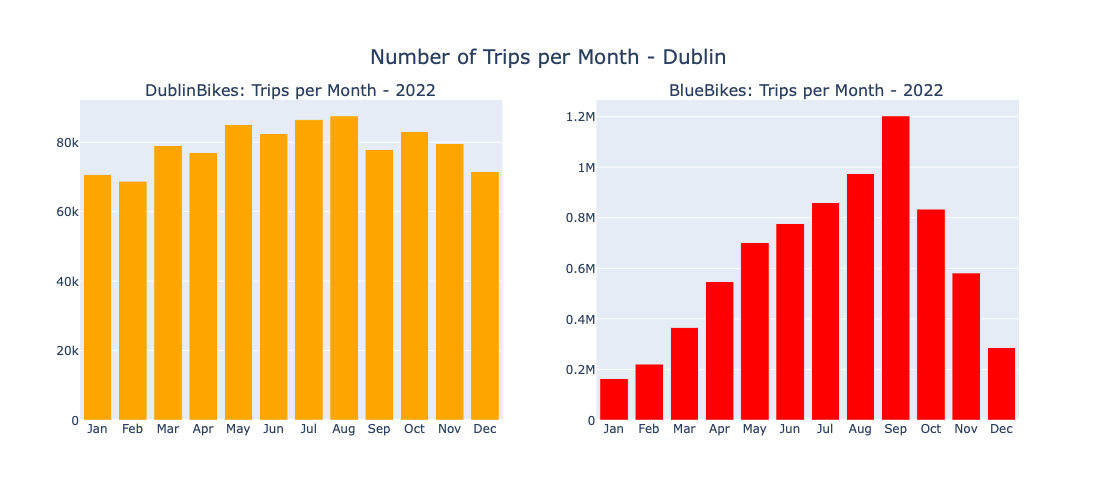

In [68]:
#Selecting dataset and creating number of trips.

dublin_trips_per_month = dublin_trips_per_time.groupby('month').size().reset_index(name='number_of_trips')
boston_trips_per_month = boston_trips_per_time.groupby('month').size().reset_index(name='number_of_trips')

# Transforming numbers into weekday names.
m_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Takes all values from the 'weekday' column and substitutes them for the dictionary values.
dublin_trips_per_month['month_name'] = dublin_trips_per_month['month'].apply(lambda x: m_names[x-1]) 
boston_trips_per_month['month_name'] = boston_trips_per_month['month'].apply(lambda x: m_names[x - 1])

# Making subplots and plotting. 

fig_month = make_subplots(rows=1, cols=2, subplot_titles=('DublinBikes: Trips per Month - 2022', 'BlueBikes: Trips per Month - 2022'))
 

dublin_fig_month = px.bar(dublin_trips_per_month, x='month_name', y='number_of_trips', 
             labels={'month_name': 'Month', 'number_of_trips': 'Number of Trips'},
             title = 'Number of Trips per Month - Dublin',
             width=800,
             height=600,
             category_orders={'month_name': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']},
             color_discrete_sequence=['orange'])

for trace in dublin_fig_month['data']:
    fig_month.add_trace(trace, row=1, col=1)

boston_fig_month = px.bar(boston_trips_per_month, x='month_name', y='number_of_trips',
             labels={'month_name': 'Month', 'number_of_trips': 'Number of Trips'},
             title='Number of Trips per Month - Boston',
             width=800,
             height=600,
             category_orders={'month_name': m_names},
             color_discrete_sequence=['red'])


for trace in boston_fig_month['data']:
    fig_month.add_trace(trace, row=1, col=2)

fig_month .update_traces(textposition='outside')
fig_month .update_layout(title={'text': 'Number of Trips per Month - Dublin',
                         'y':0.9,'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top','font': {'size': 20}}, height=500, width=1000, showlegend=False)
fig_month.show()

# Adapted from: https://community.plotly.com/t/creating-a-subplot-from-2-exisitng-plots/66835/4

# 3. Statistics

In [69]:
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import chi2_contingency

## 3.1.  DublinBikes and BlueBikes Boston: Descriptive Statistics

For the descriptive statistics, we will focus on the number of trips per station accross the year.

In [151]:
# Describe for DublinBikes.

dublin_descriptive_trips = dublin_total_trips.describe().drop(columns=['station_id']).round(1)
dublin_descriptive_trips

#Font: Adpated from https://stackoverflow.com/questions/28810101/can-you-call-multiple-methods-on-one-line

trips_started  trips_ended  total_trips_per_station
count          114.0        114.0                    114.0
mean          9298.2       9297.8                  18596.0
std           3803.4       3803.2                   7606.7
min           1523.0       1532.0                   3055.0
25%           6687.2       6686.5                  13373.8
50%           8649.0       8656.0                  17305.0
75%          11695.0      11689.5                  23384.5
max          21374.0      21364.0                  42738.0

In [71]:
range_dublin_started = 21374 - 1523
range_dublin_ended = 21364 - 1523
range_dublin_total = 42738 - 3055

print('Range:\n', 'Started:', range_dublin_started, 'Ended:', range_dublin_ended, 'Total:', range_dublin_total )

Range:
 Started: 19851 Ended: 19841 Total: 39683


In [72]:
# Coeficient of Variation: Calculate the ratio of the standard deviation to the mean.

cv_dublin = dublin_descriptive_trips[['trips_started', 'trips_ended', 'total_trips_per_station']].std()/dublin_descriptive_trips[['trips_started', 'trips_ended', 'total_trips_per_station']].mean()
print('CV:\n',cv_dublin)

CV:
 trips_started              0.853943
trips_ended                0.853399
total_trips_per_station    0.855635
dtype: float64


##### Conclusion:

We can observe that all means values are slightly higher than than the median, suggesting a slighly right-skewed dataset. The high coeficient of variation and range show a high variability in the number of trips across the different stations.

In [73]:
# Describe for BlueBikes Boston.

boston_descriptive_trips = boston_total_trips.describe().drop(columns=['station_id']).round(1)
boston_descriptive_trips

#Font: Adpated from https://stackoverflow.com/questions/28810101/can-you-call-multiple-methods-on-one-line

trips_started  trips_ended  total_trips
count          467.0        467.0        467.0
mean          8123.0       8125.3      16248.3
std           9977.1      10070.4      19985.4
min              8.0          7.0         16.0
25%           1081.0        988.5       2178.0
50%           4374.0       4224.0       8742.0
75%          12279.0      12145.5      24025.5
max          85638.0      85247.0     170885.0

In [74]:
range_boston_started = 85638 - 8
range_boston_ended = 85247 - 7
range_boston_total = 170885 - 16

print('Range:\n', 'Started:', range_boston_started, 'Ended:', range_boston_ended, 'Total:', range_boston_total )


Range:
 Started: 85630 Ended: 85240 Total: 170869


In [75]:
# Coeficient of Variation: Calculate the ratio of the standard deviation to the mean.

cv_boston = boston_descriptive_trips[['trips_started', 'trips_ended', 'total_trips']].std()/boston_descriptive_trips[['trips_started', 'trips_ended', 'total_trips']].mean()

print('CV:\n',cv_boston)

CV:
 trips_started    1.890274
trips_ended      1.892691
total_trips      1.897616
dtype: float64


##### Conclusion:

BlueBikes Boston dataset has a large difference between the means and the medians, suggesting a strongly right-skewed dataset. The extremely high coeficient of variation and range for the total number of trips also show a wide variation in the number of trips across the different stations.

### 3.2.1. Interval of Conffidence

In [76]:
#Preparing data.

dublin_mean_trips = dublin_total_trips['total_trips_per_station'].mean()
dublin_std_trips = dublin_total_trips['total_trips_per_station'].std()

n_dublin= len(dublin_total_trips)


boston_mean_trips = boston_total_trips['total_trips'].mean()
boston_std_trips = boston_total_trips['total_trips'].std()

n_boston = len(boston_total_trips)

# Calculating confidence interval for the mean trips per station.

confidence_interval_dublin = stats.norm.interval(0.95, loc=dublin_mean_trips, scale=dublin_std_trips/np.sqrt(n_dublin))
print('Dublin - 95% Confidence Interval: ', confidence_interval_dublin)

confidence_interval_boston = stats.norm.interval(0.95, loc=boston_mean_trips, scale=boston_std_trips/np.sqrt(n_boston))
print('Boston - 95% Confidence Interval: ', confidence_interval_boston)

# Font: Adapted from https://cursos.alura.com.br/forum/topico-sobre-o-intervalo-de-confianca-0-95-e-sua-relacao-com-o-z-de-0-975-299557

Dublin - 95% Confidence Interval:  (17199.61816652643, 19992.294114175325)
Boston - 95% Confidence Interval:  (14435.71679381757, 18060.917039158874)


##### Conclusion:

The 95% interval for the dataset suggest that they do not overlap, suggesting a significant difference between the mean total trips per station in Dublin and Boston. 

### 3.2.2 Testing for normality and skewness

In [77]:
# Shapiro-Wilk test for normality - Null hypothesis: The data present in this dataset is normally distributed.

dublin_shapiro_started = shapiro(dublin_total_trips['trips_started'])
dublin_shapiro_ended = shapiro(dublin_total_trips['trips_ended'])
dublin_shapiro_total = shapiro(dublin_total_trips['total_trips_per_station'])

boston_shapiro_started = shapiro(boston_total_trips['trips_started'])
boston_shapiro_ended = shapiro(boston_total_trips['trips_ended'])
boston_shapiro_total = shapiro(boston_total_trips['total_trips'])

print('Dublin Started:   ',dublin_shapiro_started)
print('Dublin Ended  :   ', dublin_shapiro_ended) 
print('Dublin Total  :   ', dublin_shapiro_total)
print('\n')
print('Boston Started:   ',boston_shapiro_started)
print('Boston Ended  :   ', boston_shapiro_ended)
print('Boston Total  :   ', boston_shapiro_total)

Dublin Started:    ShapiroResult(statistic=0.9724954962730408, pvalue=0.018859002739191055)
Dublin Ended  :    ShapiroResult(statistic=0.9725368022918701, pvalue=0.019014067947864532)
Dublin Total  :    ShapiroResult(statistic=0.972517728805542, pvalue=0.01894235797226429)


Boston Started:    ShapiroResult(statistic=0.7491462826728821, pvalue=5.234705322235706e-26)
Boston Ended  :    ShapiroResult(statistic=0.7466256618499756, pvalue=4.06187284252298e-26)
Boston Total  :    ShapiroResult(statistic=0.747596800327301, pvalue=4.4778240985552556e-26)


##### Conclusion:

For the extremely low results for both datasets, the null hypothesis is rejected. Therefore, both datasets are not normally distributed.

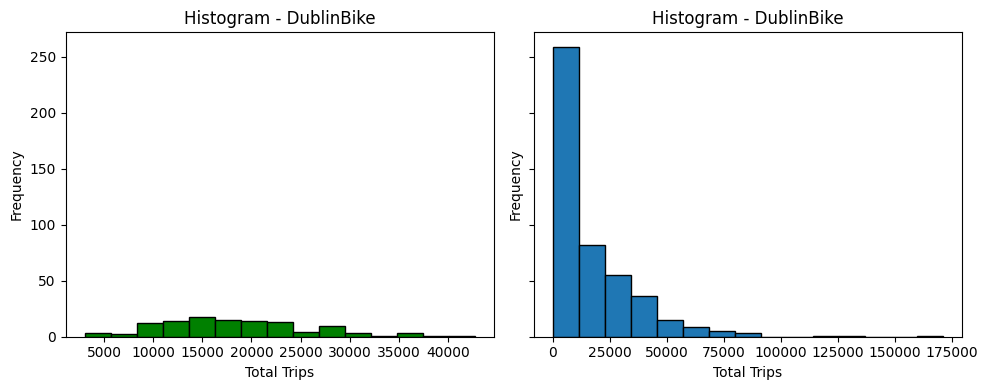

Skewness test DublinBikes:
 trips_started              1.062998
trips_ended                1.062268
total_trips_per_station    1.055944
dtype: float64


Skewness test Bluebikes Boston:
 trips_started    2.686481
trips_ended      2.685210
total_trips      2.687157
dtype: float64


In [78]:
# Testing for skewness and vizualisation.

# Subplot for word counts frequencies.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)

axes[0].hist(dublin_total_trips['total_trips_per_station'], bins=15, edgecolor='black', color='green')
axes[0].set_title('Histogram - DublinBike')
axes[0].set_xlabel('Total Trips')
axes[0].set_ylabel('Frequency')

axes[1].hist(boston_total_trips['total_trips'], bins=15, edgecolor='black')
axes[1].set_title('Histogram - DublinBike')
axes[1].set_xlabel('Total Trips')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Skewness: Measuring asymmetry and peakedness of distribution of trips.

skewness_dublin = dublin_descriptive_trips[['trips_started', 'trips_ended', 'total_trips_per_station']].skew()
skewness_boston = boston_descriptive_trips[['trips_started', 'trips_ended', 'total_trips']].skew()

print('Skewness test DublinBikes:\n',skewness_dublin)
print('\n')
print('Skewness test Bluebikes Boston:\n',skewness_boston)

##### Conclusion:

The skewness test corroborates non-normallity of the datatsets. The positive skewness demonstrates that the the 'tail' is longer in the right part of the distribution. A high positive value, such as the one in the Boston dataset, suggests a right-skewed distribution with less high-frequency values and more low-frequency values.

### 3.2.3. Checking for Linearity

### Non-Parametric Tests

In [79]:
# Chi2 test - Null hypothesis: There is no significant association between the station (location) and total number of trips.

# Creating cross tab.

dublin_cross_tab = pd.crosstab(dublin_total_trips['station_id'], dublin_total_trips['total_trips_per_station'])
boston_cross_tab = pd.crosstab(boston_total_trips['station_id'], boston_total_trips['total_trips'])

# Calculating chi2 tests.

chi2_dublin, p_dublin, dof_dublin, ex_dublin = chi2_contingency(dublin_cross_tab)
chi2_boston, p_boston, dof_boston, ex_boston = chi2_contingency(boston_cross_tab)

print('DublinBikes chi2: ','Chi2: ', chi2_dublin,'P_value ', p_dublin)
print('BlueBikes Boston chi2: ','Chi2: ', chi2_boston,'P_value ', p_boston)

# Font: Adapted from https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

DublinBikes chi2:  Chi2:  12882.0 P_value  0.23910009630521376
BlueBikes Boston chi2:  Chi2:  212017.99999999994 P_value  0.25559781014515154


##### Conclusion

P-values for the two dataset have (0.239 for Dublin and 0.256 for Boston) are above the significance level and we cannot reject the null hypothesis. Therefore, there is no significant association between the station and total number of trips.

Mann-Whitney Test: Comparing the distribution between datasets.

In [80]:
# Mann-Whitney test - Null hypothesis: There are no difference between the distribution of total trips between
# DublinBikes and BlueBikes Boston.

m_w_test = mannwhitneyu(dublin_total_trips['total_trips_per_station'], boston_total_trips['total_trips'])
print('Mann-Whitney U test: ', m_w_test)

Mann-Whitney U test:  MannwhitneyuResult(statistic=35140.5, pvalue=1.1401230497286028e-07)


##### Conclusion:

The extremey low p-value demonstrates that the null hypothesis should be rejected and there is a significant difference between the distribution of the total number of trips per station when comparing both bike schemes.

# 4. Machine Learning

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

## 4.1. DublinBikes Time Series Forecasting

### 4.1.1. Splitting the dataset

For processing reasons, the models will not be tested on the whole time stamp. As a plausible question, the trips per month will be predicted by filtering the dataset per month and aggregating trips for that period. This way, we can reduce the size of the dataset and still perform an analyses for the whole year.

In [82]:
# Selecting relevant columns.

dublin_trips_per_month = dublin_trips_per_time[['station_id', 'month', 'total_trips_per_station']]

In [83]:
# Grouping months.

dublin_trips_per_month = dublin_trips_per_month.groupby(['station_id', 'month'])['total_trips_per_station'].sum().reset_index()

In [153]:
dublin_trips_per_month.head(15)

station_id  month  total_trips_per_station
0            1      5                     1019
1            1      6                     1384
2            1      7                     1969
3            1      8                     1980
4            1      9                     1666
5            1     10                     1931
6            1     11                     1822
7            1     12                     1769
8            2      1                     1163
9            2      2                     1313
10           2      3                     1332
11           2      4                     1486
12           2      5                     1572
13           2      6                     1836
14           2      7                     1702

In [85]:
# Spliting data into X and y.

X = dublin_trips_per_month[['station_id', 'month']]
y = dublin_trips_per_month['total_trips_per_station']

# Spliting data into train and test. (Train: 80%, Test: 20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.1.2. Model 1: XG Boost

#### Training, predicting, and evaluating model.

In [86]:
# Training model.

xgb_test = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_test.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
# Predictions.

xgb_y_pred_init = xgb_test.predict(X_test)

In [88]:
# Calculating performance.

xgb_mse_init = mean_squared_error(y_test, xgb_y_pred_init)
xgb_r2_init = r2_score(y_test, xgb_y_pred_init)

print(f"R^2: {xgb_r2_init:.4f}")
print(f"Mean Squared Error: {xgb_mse_init}")

R^2: 0.8275
Mean Squared Error: 79621.04142771066


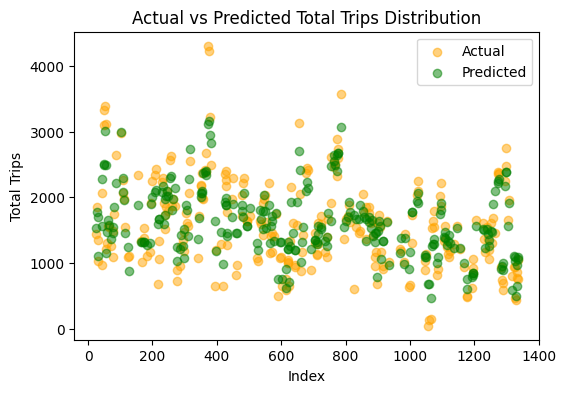

In [89]:
# Plot actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(X_test.index, y_test, color='orange', alpha=0.5, label='Actual')
plt.scatter(X_test.index, xgb_y_pred_init, color='green', alpha=0.5, label='Predicted')

# Labels and title
plt.xlabel("Index")
plt.ylabel("Total Trips")
plt.title("Actual vs Predicted Total Trips Distribution")
plt.legend()
plt.show()

In [90]:
xgb_plotmonth = X_test.copy()
xgb_plotmonth['actual'] = y_test.values
xgb_plotmonth['predicted'] = xgb_y_pred_init

In [91]:
monthly_actual = xgb_plotmonth.groupby('month')['actual'].sum().reset_index()
xgb_monthly_pred_init = xgb_plotmonth.groupby('month')['predicted'].sum().reset_index()

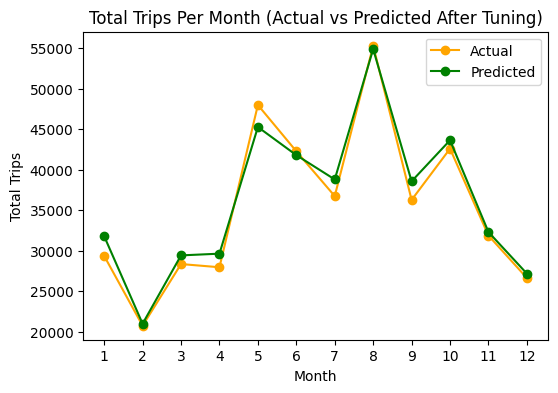

In [92]:
# Ploting total trips per month.

plt.figure(figsize=(6, 4))
plt.plot(monthly_actual['month'], monthly_actual['actual'], marker='o', linestyle='-', color='orange', label='Actual')
plt.plot(xgb_monthly_pred_init['month'], xgb_monthly_pred_init['predicted'], marker='o', linestyle='-', color='green', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('Total Trips Per Month (Actual vs Predicted##‹‹)')

# Labling months in the axis X.

plt.xticks(monthly_actual['month']) 
plt.legend()
plt.show()

#### GridSearchCV: parameter tuning and comparison between initial and tuned.

In [93]:
xgb_param_grid = {'n_estimators': [100, 200],'learning_rate': [0.1, 0.3],'max_depth': [5, 7],'min_child_weight': [1, 3],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0],'reg_alpha': [0, 0.1, 0.5],'reg_lambda': [1, 1.5, 2]}

xgb_grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), xgb_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

xgb_best_params = xgb_grid_search.best_params_
print(f"Best parameters: {xgb_best_params}")

xgb_best_model = xgb_grid_search.best_estimator_
xgb_y_pred_tuning = xgb_best_model.predict(X_test)

xgb_mse_tuning = mean_squared_error(y_test, xgb_y_pred_tuning)
xgb_r2_tuning = r2_score(y_test, xgb_y_pred_tuning)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lamb

In [94]:
print(f"Mean Squared Error after tuning: {xgb_mse_tuning}")
print(f"R^2 after tuning: {xgb_r2_tuning:.4f}")

Mean Squared Error after tuning: 43311.7183629055
R^2 after tuning: 0.9062


##### Results (comparison):

In [95]:
print(f"R^2: {xgb_r2_init:.4f}")
print(f"R^2 after tuning: {xgb_r2_tuning:.4f}")
print(f"Mean Squared Error: {xgb_mse_init}")
print(f"Mean Squared Error after tuning: {xgb_mse_tuning}")

R^2: 0.8275
R^2 after tuning: 0.9062
Mean Squared Error: 79621.04142771066
Mean Squared Error after tuning: 43311.7183629055


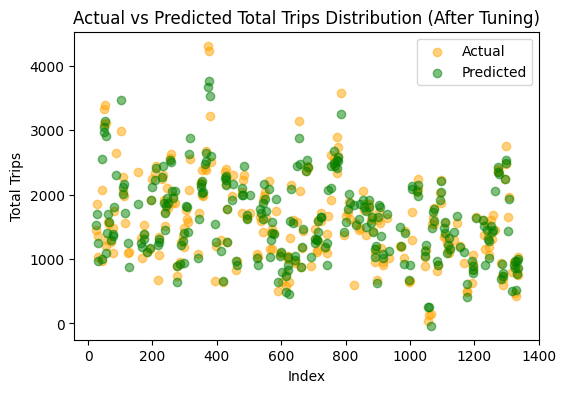

In [96]:
 # Plot actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(X_test.index, y_test, color='orange', alpha=0.5, label='Actual')
plt.scatter(X_test.index, xgb_y_pred_tuning, color='green', alpha=0.5, label='Predicted')

# Labels and title
plt.xlabel("Index")
plt.ylabel("Total Trips")
plt.title("Actual vs Predicted Total Trips Distribution (After Tuning)")
plt.legend()
plt.show()

In [97]:
xgb_plotmonth = X_test.copy()
xgb_plotmonth['actual'] = y_test.values
xgb_plotmonth['predicted'] = xgb_y_pred_tuning

In [98]:
monthly_actual = xgb_plotmonth.groupby('month')['actual'].sum().reset_index()
xgb_monthly_pred_tuning = xgb_plotmonth.groupby('month')['predicted'].sum().reset_index()

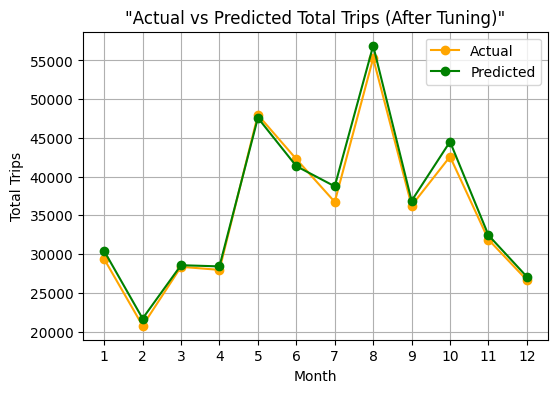

In [99]:
# Ploting total trips per month with predicted after tuning.

plt.figure(figsize=(6, 4))
plt.plot(monthly_actual['month'], monthly_actual['actual'], marker='o', linestyle='-', color='orange', label='Actual')
plt.plot(xgb_monthly_pred_tuning['month'], xgb_monthly_pred_tuning['predicted'], marker='o', linestyle='-', color='green', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('"Actual vs Predicted Total Trips (After Tuning)"')

# Labling months in the axis X.

plt.xticks(monthly_actual['month']) 
plt.grid(True)
plt.legend()
plt.show()

### 4.1.3. Model 2: Random Forest

#### Training, predicting, and evaluating model.

In [100]:
rf_test = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_test.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
rf_y_pred_init = rf_test.predict(X_test)

In [102]:
# Calculating intial performance.

rf_mse_init = mean_squared_error(y_test, rf_y_pred_init)
rf_r2_init = r2_score(y_test, rf_y_pred_init)

print(f"R^2: {rf_r2_init:.4f}")
print(f"Mean Squared Error: {rf_mse_init}")

R^2: 0.8656
Mean Squared Error: 62047.68724907064


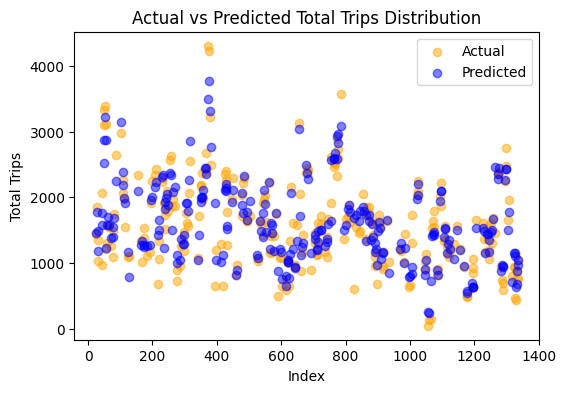

In [103]:
# Plot actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(X_test.index, y_test, color='orange', alpha=0.5, label='Actual')
plt.scatter(X_test.index, rf_y_pred_init, color='blue', alpha=0.5, label='Predicted')

# Labels and title
plt.xlabel("Index")
plt.ylabel("Total Trips")
plt.title("Actual vs Predicted Total Trips Distribution")
plt.legend()
plt.show()

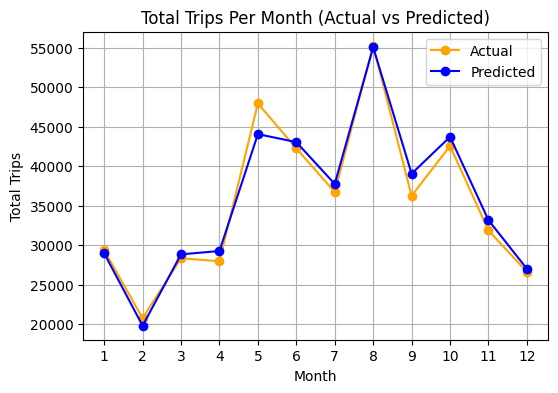

In [104]:
rf_plotmonth = X_test.copy()
rf_plotmonth['actual'] = y_test.values
rf_plotmonth['predicted'] = rf_y_pred_init

monthly_actual = rf_plotmonth.groupby('month')['actual'].sum().reset_index()
rf_monthly_pred_init = rf_plotmonth.groupby('month')['predicted'].sum().reset_index()

# Ploting total trips per month with predicted after tuning.

plt.figure(figsize=(6, 4))
plt.plot(monthly_actual['month'], monthly_actual['actual'], marker='o', linestyle='-', color='orange', label='Actual')
plt.plot(rf_monthly_pred_init['month'], rf_monthly_pred_init['predicted'], marker='o', linestyle='-', color='blue', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('Total Trips Per Month (Actual vs Predicted)')

# Labling months in the axis X.

plt.xticks(monthly_actual['month']) 
plt.grid(True)
plt.legend()
plt.show()

In [105]:
rf_param_grid = { 'n_estimators': [100, 200, 500], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],'bootstrap': [True, False]}

rf_grid_search = GridSearchCV(estimator = rf_test, param_grid = rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
print(f"Best parameters: {rf_best_params}")

rf_best_model = rf_grid_search.best_estimator_
rf_y_pred_tuning = rf_best_model.predict(X_test)

rf_mse_tuning = mean_squared_error(y_test, rf_y_pred_tuning)
rf_r2_tuning = r2_score(y_test, rf_y_pred_tuning)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.

In [106]:
print(f"Mean Squared Error after tuning: {rf_mse_tuning}")
print(f"R^2 after tuning: {rf_r2_tuning:.4f}")

Mean Squared Error after tuning: 62125.34228954647
R^2 after tuning: 0.8654


##### Result:

In [107]:
print(f"R^2: {rf_r2_init:.4f}")
print(f"R^2 after tuning: {rf_r2_tuning:.4f}")
print(f"Mean Squared Error: {rf_mse_init}")
print(f"Mean Squared Error after tuning: {rf_mse_tuning}")

R^2: 0.8656
R^2 after tuning: 0.8654
Mean Squared Error: 62047.68724907064
Mean Squared Error after tuning: 62125.34228954647


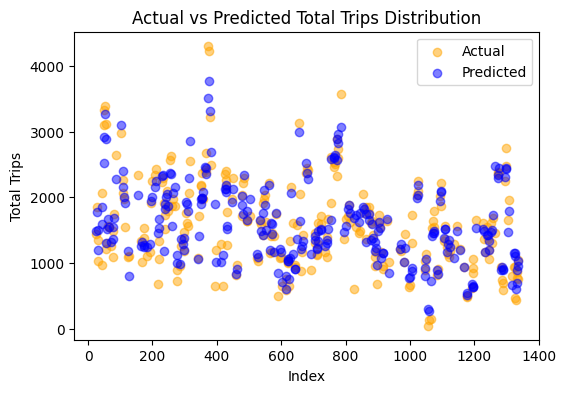

In [108]:
# Plot actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(X_test.index, y_test, color='orange', alpha=0.5, label='Actual')
plt.scatter(X_test.index, rf_y_pred_tuning, color='blue', alpha=0.5, label='Predicted')

# Labels and title
plt.xlabel("Index")
plt.ylabel("Total Trips")
plt.title("Actual vs Predicted Total Trips Distribution")
plt.legend()
plt.show()

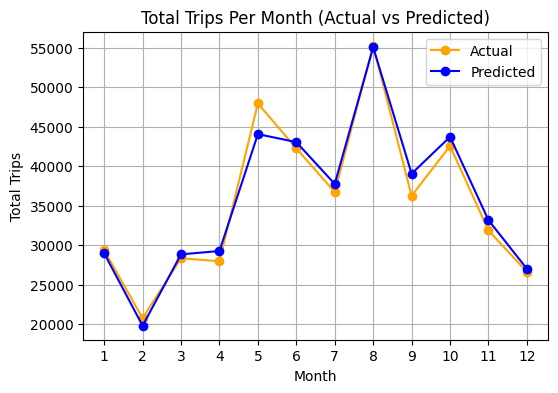

In [109]:
rf_plotmonth = X_test.copy()
rf_plotmonth['actual'] = y_test.values
rf_plotmonth['predicted'] = rf_y_pred_init

monthly_actual = rf_plotmonth.groupby('month')['actual'].sum().reset_index()
rf_monthly_pred_tuning = rf_plotmonth.groupby('month')['predicted'].sum().reset_index()

# Ploting total trips per month with predicted after tuning.

plt.figure(figsize=(6, 4))
plt.plot(monthly_actual['month'], monthly_actual['actual'], marker='o', linestyle='-', color='orange', label='Actual')
plt.plot(rf_monthly_pred_tuning['month'], rf_monthly_pred_tuning['predicted'], marker='o', linestyle='-', color='blue', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('Total Trips Per Month (Actual vs Predicted)')

# Labling months in the axis X.

plt.xticks(monthly_actual['month']) 
plt.grid(True)
plt.legend()
plt.show()

## 4.2. Reddit Comments: Sentiment Analysis

## 4.2.1. Data Collection

In [110]:
from dotenv import load_dotenv
load_dotenv()
import praw
import json

### Setting Parameters and Initializing Instances

In [111]:
# Getting values.

client_id =os.getenv('CLIENT_ID')  
client_secret =os.getenv('CLIENT_SECRET')   
user_agent =os.getenv('USER_AGENT')

# Verifying variables (this section should be commented out or delete in producting for safety reasons).

print(client_id)
print(client_secret)
print(user_agent)

None
None
None


In [112]:
# Initializing instances

#reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

# Def for collecting comments

#def getting_comments(subreddit_name, query, limit=1000):
#    subreddit = reddit.subreddit(subreddit_name)
#    comments_data = []

#    for submission in subreddit.search(query, limit=limit):
#       submission.comments.replace_more(limit=0)
#        for comment in submission.comments.list():
#            comments_data.append({'comment_id':comment.id, 'comment_body': comment.body, 'comment_score':comment.score, 
#                                  'comment_author':str(comment.author), 'submission_title': submission.title, 
#                                  'submission_id': submission.id, 'submission_id':submission.id, 'submission_score':submission.score,
#                                  'submission_author': str(submission.author), 'submission_url':submission.url})

#   return comments_data

### Fetching, storing, and reading comments.

In [113]:

#dublin_comments = getting_comments('all', 'DublinBikes', limit=500)
#boston_comments = getting_comments('all', 'BlueBikes Boston', limit=500)


In [114]:
# Retrieval and storage of comments. An 'else' statment was added in order to prevent writing empty data to the .json file.


#if dublin_comments:
#    with open('dublin_comments.json', 'w') as f:
#        json.dump(dublin_comments, f, indent=4)
#else:
#    print("DublinBike: No comments fetched.")

#if boston_comments:
#    with open('boston_comments.json', 'w') as f:
#        json.dump(boston_comments, f, indent=4)
#else:
#    print("BlueBikes Boston: No comments fetched.")

In [115]:
with open('dublin_comments.json', 'r') as f:
    dublinbikes_json = json.load(f)
    print("DublinBikes Comments JSON:", dublinbikes_json[:1])  # Print first 1 comments to verify

with open('boston_comments.json', 'r') as f:
    bluebikes_boston_json = json.load(f)
    print("BlueBikes Boston Comments JSON:", bluebikes_boston_json[:1])  # Print first 1 comments to verify

# Font: https://www.geeksforgeeks.org/how-to-read-json-files-with-pandas/

DublinBikes Comments JSON: [{'comment_id': 'j6hysga', 'comment_body': "Link doesn't open for me. So should people he bringing their own helmets if wanting to us these bikes or should they be provided?", 'comment_score': 20, 'comment_author': 'chuckitoutorelse', 'submission_title': 'Woman who had injury award reduced due to lack of helmet was using DublinBikes', 'submission_id': '10p1whc', 'submission_score': 28, 'submission_author': 'Mark_Fuckerberg_', 'submission_url': 'https://irishcycle.com/2023/01/29/woman-who-had-injury-award-reduced-due-to-lack-of-helmet-was-using-dublinbikes/'}]
BlueBikes Boston Comments JSON: [{'comment_id': 'kec9xvn', 'comment_body': 'Boston gang!! As much as I think e bikes are corny as a “road bicyclist?” I think this is awesome for people who may not ever use other options than uber/ driving. Quick brap on an e bike for the people who are like “oooh no I’d get sweaty on my way to work” could be monumental for transit in the city if people use them. \n\nAlso

In [116]:
# Reading json files

df_dublin_comments = pd.read_json('dublin_comments.json')
df_boston_comments = pd.read_json('boston_comments.json')

## 4.2.2. DublinBikes comments: Data Processing and Inspection

### Inspecting Data

In [117]:
df_dublin_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8994 entries, 0 to 8993
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment_id         8994 non-null   object
 1   comment_body       8994 non-null   object
 2   comment_score      8994 non-null   int64 
 3   comment_author     8994 non-null   object
 4   submission_title   8994 non-null   object
 5   submission_id      8994 non-null   object
 6   submission_score   8994 non-null   int64 
 7   submission_author  8994 non-null   object
 8   submission_url     8994 non-null   object
dtypes: int64(2), object(7)
memory usage: 632.5+ KB


### Handling Missing Values

In [118]:
df_dublin_comments.isnull().sum()

comment_id           0
comment_body         0
comment_score        0
comment_author       0
submission_title     0
submission_id        0
submission_score     0
submission_author    0
submission_url       0
dtype: int64

### Detecting Duplicates

In [119]:
# Detecting duplicates (It is very unlikely there are duplicates due to the origin of the data, but it will be performed just in case).
# If it is 'False', there are no duplicated rows in the dataset.

dupli_dublin_comments = df_dublin_comments.duplicated().any()

print(f'Are there any duplicated rows in the whole dataset? {dupli_dublin_comments}')

Are there any duplicated rows in the whole dataset? False


### Selecting Columns

In [120]:
# Dropping columns.

drop_column_dublin_comments = ['comment_id', 'comment_score', 'submission_id', 'submission_score', 'submission_author', 'submission_url', 'submission_title', 'comment_author'] 
df_dublin_comments = df_dublin_comments.drop(columns = drop_column_dublin_comments)

### Cleaning and Removing Data

In [121]:
import re
import contractions
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [122]:
# Lower casing

df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing punctuation

df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].str.replace(f'[{string.punctuation}]', '', regex=True)

# Removing stop words

stop = stopwords.words('english')
df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Removing frequent words

freq = pd.Series(' '.join(df_dublin_comments['comment_body']).split()).value_counts()[:10]
freq = list(freq.index)
df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Removing rare words

freq = pd.Series(' '.join(df_dublin_comments['comment_body']).split()).value_counts()[-10:]
freq = list(freq.index)
df_dublin_comments['comment_body'] = df_dublin_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


## 4.2.3. BlueBikes Boston Comments: Data Processing and Inspection

#### Inspecting Data

In [123]:
df_boston_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6549 entries, 0 to 6548
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment_id         6549 non-null   object
 1   comment_body       6549 non-null   object
 2   comment_score      6549 non-null   int64 
 3   comment_author     6549 non-null   object
 4   submission_title   6549 non-null   object
 5   submission_id      6549 non-null   object
 6   submission_score   6549 non-null   int64 
 7   submission_author  6549 non-null   object
 8   submission_url     6549 non-null   object
dtypes: int64(2), object(7)
memory usage: 460.6+ KB


#### Handling Missing Values

In [124]:
df_boston_comments.isnull().sum()

comment_id           0
comment_body         0
comment_score        0
comment_author       0
submission_title     0
submission_id        0
submission_score     0
submission_author    0
submission_url       0
dtype: int64

#### Detecting Duplicates

In [125]:
# Detecting duplicates (It is very unlikely there are duplicates due to the origin of the data, but it will be performed just in case).
# If it is 'False', there are no duplicated rows in the dataset.

dupli_boston_comments = df_boston_comments.duplicated().any()

print(f'Are there any duplicated rows in the whole dataset? {dupli_boston_comments}')

Are there any duplicated rows in the whole dataset? False


### Selecting Columns

In [126]:
drop_column_boston_comments = ['comment_id', 'comment_score', 'submission_id', 'submission_score', 'submission_author', 'submission_url', 'submission_title', 'comment_author'] 
df_boston_comments = df_boston_comments.drop(columns = drop_column_boston_comments)


### Cleaning and Removing Data

In [127]:
# Lower casing

df_boston_comments['comment_body'] = df_boston_comments['comment_body'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing punctuation

df_boston_comments['comment_body'] = df_boston_comments['comment_body'].str.replace(f'[{string.punctuation}]', '', regex=True)

# Removing stop words

stop = stopwords.words('english')
df_boston_comments['comment_body'] = df_boston_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Removing frequent words

freq = pd.Series(' '.join(df_boston_comments['comment_body']).split()).value_counts()[:10]
freq = list(freq.index)
df_boston_comments['comment_body'] = df_boston_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Removing rare words

freq = pd.Series(' '.join(df_boston_comments['comment_body']).split()).value_counts()[-10:]
freq = list(freq.index)
df_boston_comments['comment_body'] = df_boston_comments['comment_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

## 4.2.4. Feature Engineering / Extraction (DublinBikes and BlueBikes Boston)

In [128]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Font: adapted from https://medium.com/turing-talks/como-fazer-uma-análise-de-sentimentos-com-vader-21bbe3f3e38d


### Word Counting

In [129]:
# Lambda function: Creating a word count column to check number of words x score

df_dublin_comments['word_count'] = df_dublin_comments['comment_body'].apply(lambda x: len(str(x).split(" ")))
df_boston_comments['word_count'] = df_boston_comments['comment_body'].apply(lambda x: len(str(x).split(" ")))

### Polarity

In [130]:
# Creating a Polarity Column

analyser = SentimentIntensityAnalyzer()

def analysis(text):
 df_analysed = analyser.polarity_scores(text)['compound'] 
 return df_analysed

def analysis(text):
 df_analysed = analyser.polarity_scores(text)['compound'] 
 return df_analysed

# Creating 'polarity' column.
df_dublin_comments['comment_polarity'] = df_dublin_comments['comment_body'].apply(analysis)
df_boston_comments['comment_polarity'] = df_boston_comments['comment_body'].apply(analysis)


In [131]:
# Comment Score (labling polarity)

def analysis2(score):
  if score > 0:
    return 'positive'
  elif score < 0:
    return 'negative'
  else:
    return 'neutral'
      
  
 # Appplynng analysis

df_dublin_comments['comment_score'] = df_dublin_comments['comment_polarity'].apply(analysis2)
df_boston_comments['comment_score'] = df_boston_comments['comment_polarity'].apply(analysis2)

# Score counting

dublin_pos_comments = df_dublin_comments[df_dublin_comments['comment_score']=='positive'].shape[0]
dublin_neg_comments = df_dublin_comments[df_dublin_comments['comment_score']=='negative'].shape[0]
dublin_neu_comments = df_dublin_comments[df_dublin_comments['comment_score']=='neutral'].shape[0]

boston_pos_comments = df_boston_comments[df_boston_comments['comment_score']=='positive'].shape[0]
boston_neg_comments = df_boston_comments[df_boston_comments['comment_score']=='negative'].shape[0]
boston_neu_comments = df_boston_comments[df_boston_comments['comment_score']=='neutral'].shape[0]

total_dublin_comments = df_dublin_comments.shape[0]
total_boston_comments = df_boston_comments.shape[0]

### Subjectivity

Subjectivity Analysis helps us understand if the comments come from a personal opinion (subjective) or it is fact-based data (objective)


In [132]:
import textblob
from textblob import TextBlob

In [133]:
# Calculating comment_subjectivity for DublinBikes comments.

def get_subjectivity_dublin(text):
    return TextBlob(text).sentiment.subjectivity

# Calculating comment_subjectivity for BlueBikes Bston Comments comments.

def get_subjectivity_boston(text):
    return TextBlob(text).sentiment.subjectivity

df_dublin_comments['comment_subjectivity'] = df_dublin_comments['comment_body'].apply(get_subjectivity_dublin)
df_boston_comments['comment_subjectivity'] = df_boston_comments['comment_body'].apply(get_subjectivity_boston)

In [134]:
df_dublin_comments.head()

comment_body  word_count  \
0  link doesnt open bringing helmets wanting us p...           8   
1  cult alright yes hit head helmet beneficial an...          53   
2  called contributory negligence catered irish l...           8   
3  weird thing within cycling community convinced...          59   
4                                            deleted           1   

   comment_polarity comment_score  comment_subjectivity  
0            0.0000       neutral                0.5000  
1           -0.1999      negative                0.3250  
2            0.0000       neutral                0.4500  
3           -0.1954      negative                0.5375  
4            0.0000       neutral                0.0000

In [135]:
df_boston_comments. head()

comment_body  word_count  \
0  gang much think e corny “road bicyclist” think...          37   
1  cheaper give ebikes repair shared paris spent ...         126   
2  i’m terrified dang scooters could handle ebike...          10   
3  im road bicyclist weekends bluebiker weekdays ...          21   
4  im entirely sure point youre trying make acces...          18   

   comment_polarity comment_score  comment_subjectivity  
0            0.7845      positive              0.600000  
1           -0.6037      negative              0.530392  
2           -0.6124      negative              0.076923  
3            0.5423      positive              0.577778  
4            0.7713      positive              0.646296

## 4.2.4. EDA and Visualization

## 2.2. DublinBikes and BlueBikes Boston Comments

### 2.2.1. Frequencies, Distribution, and General Insights

#### Word Counts

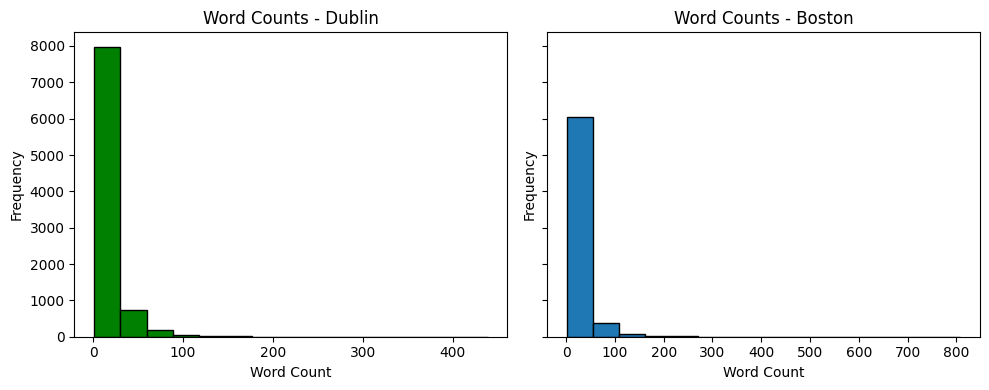

In [136]:
# Subplot for word counts frequencies.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)

axes[0].hist(df_dublin_comments['word_count'], bins=15, edgecolor='black', color='green')
axes[0].set_title('Word Counts - Dublin')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_boston_comments['word_count'], bins=15, edgecolor='black')
axes[1].set_title('Word Counts - Boston')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

#### Insight:

For both datasets, the distribution is right-skewed, being the vast majority of comments shorter than 50 words in length. 

#### Polarity

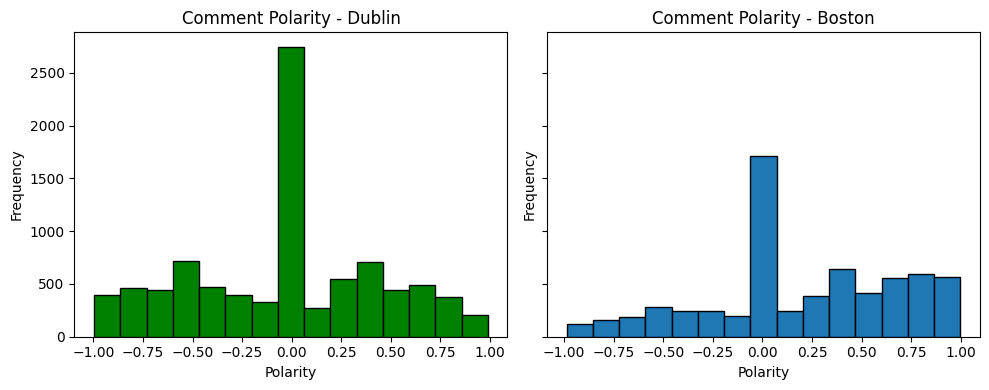

In [137]:
# Subplot for polarity frequencies.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)

axes[0].hist(df_dublin_comments['comment_polarity'], bins=15, edgecolor='black', color='green')
axes[0].set_title('Comment Polarity - Dublin')
axes[0].set_xlabel('Polarity')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_boston_comments['comment_polarity'], bins=15, edgecolor='black')
axes[1].set_title('Comment Polarity - Boston')
axes[1].set_xlabel('Polarity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

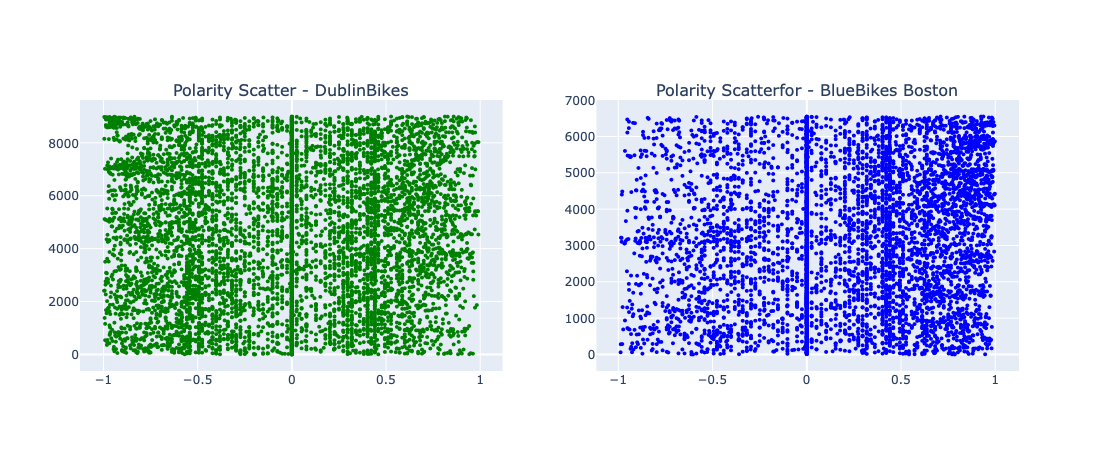

In [138]:
scatter = make_subplots(rows=1, cols=2 ,subplot_titles=('Polarity Scatter - DublinBikes', 'Polarity Scatterfor - BlueBikes Boston'))

# Polarity distribution for Dublink=Bikes.
scatter.add_trace(go.Scatter(x=df_dublin_comments['comment_polarity'], 
                             y=df_dublin_comments.index,
                             mode="markers",
                             marker=dict(color='green', size=4),
                             name = 'DublinBikes'), row=1, col=1 )


# Polarity distribution for BlueBikes Boston.
scatter.add_trace(go.Scatter(x=df_boston_comments['comment_polarity'],
                             y=df_boston_comments.index, 
                             mode="markers",
                             marker=dict(color='blue', size=4),
                             name = "BlueBikes Boston"),
                             row=1, col=2)

              
scatter.update_layout(height=450, width=900,showlegend=False)
scatter.show()

# Font: adapted from https://www.researchgate.net/figure/Scatter-Plot-of-Polarity-and-Subjectivity_fig3_352571788

#### Insights:

In both datasets the majority of comments have a polarity centered in between -0.025 and 0.25, indicating neutrality. DublinBikes dataset appears to have a fairly similar pattern when comparing negative x positive polarities, showing a considerabe peak at around -0.5 and 0.05. BlueBikes Boston dataset shows a general similar pattern, however, it presents a tendency to moderately positive sentiments with a peak in between 0.25 and 0.50 and a slight crescent towards the right.

#### Subjectivity

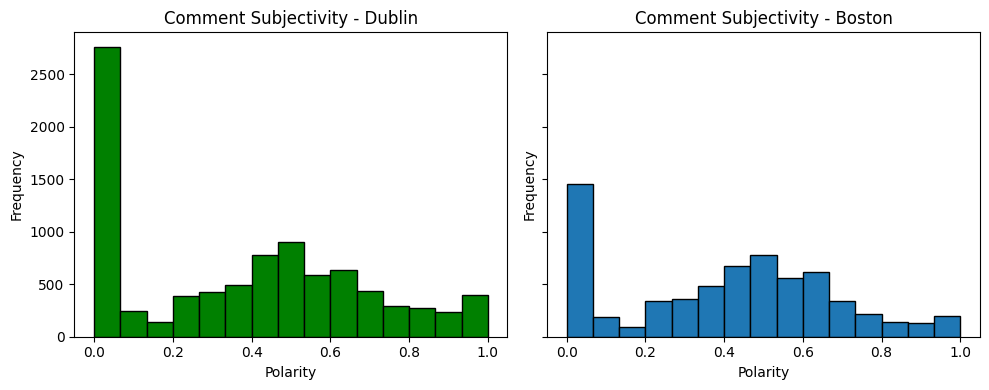

In [139]:
# Subplot for subjectivity frequencies.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)

axes[0].hist(df_dublin_comments['comment_subjectivity'], bins=15, edgecolor='black', color='green')
axes[0].set_title('Comment Subjectivity - Dublin')
axes[0].set_xlabel('Polarity')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_boston_comments['comment_subjectivity'], bins=15, edgecolor='black')
axes[1].set_title('Comment Subjectivity - Boston')
axes[1].set_xlabel('Polarity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

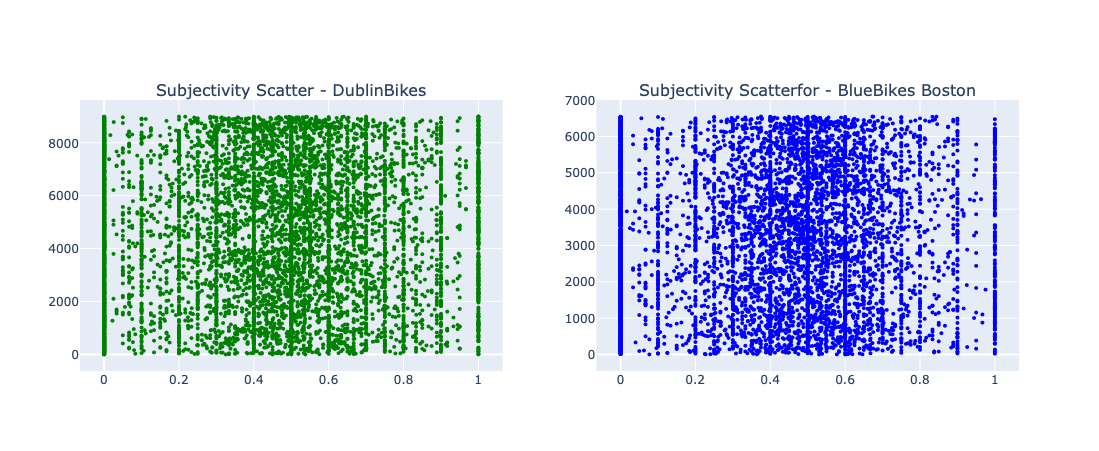

In [140]:
scatter = make_subplots(rows=1, cols=2 ,subplot_titles=('Subjectivity Scatter - DublinBikes', 'Subjectivity Scatterfor - BlueBikes Boston'))

# Subjectivity distribution for Dublink=Bikes.
scatter.add_trace(go.Scatter(x=df_dublin_comments['comment_subjectivity'], 
                             y=df_dublin_comments.index,
                             mode="markers",
                             marker=dict(color='green', size=4),
                             name = 'DublinBikes'), row=1, col=1 )


# Subjectivity distribution for BlueBikes Boston.
scatter.add_trace(go.Scatter(x=df_boston_comments['comment_subjectivity'],
                             y=df_boston_comments.index, 
                             mode="markers",
                             marker=dict(color='blue', size=4),
                             name = "BlueBikes Boston"),
                             row=1, col=2)

              
scatter.update_layout(height=450, width=900,showlegend=False)
scatter.show()

# Font: adapted from https://www.researchgate.net/figure/Scatter-Plot-of-Polarity-and-Subjectivity_fig3_352571788

#### Insights:

Both datasets follow a similar pattern, having the highest frequencies registered close to 0, which may suggest the most comments are naturally more objective and fact based. From 0.2 on, the graph show a tendency to peak around the most neutral part of the spectrum, with a slight peak at the objective extremity. This pattern can also be in the scatter plot, were we have a cluster of points next to 0 and a 'normal like' distribution with a considerable clustering around the central point.

#### Comment score: Percentage Comparison

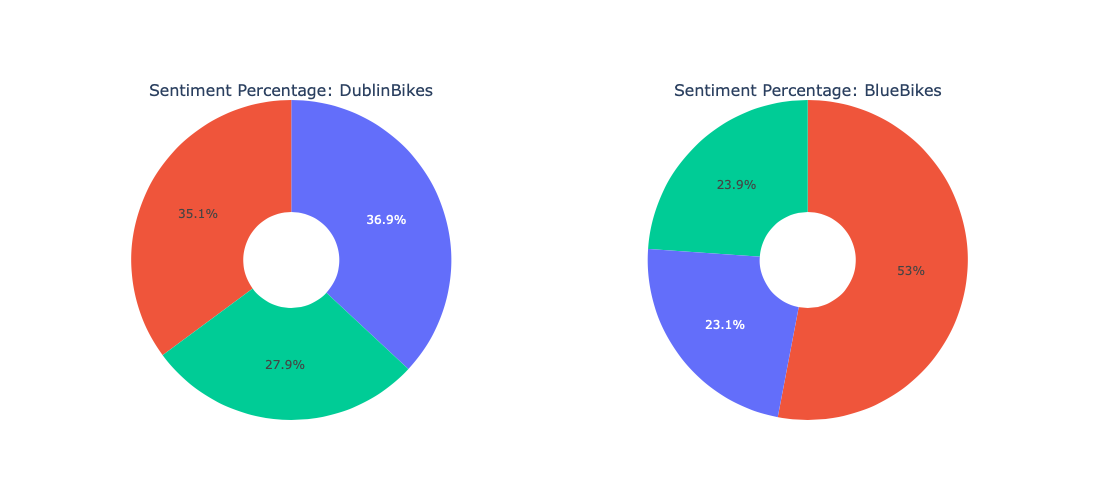

DublinBikes - Positive comments:  3160  ( 35.1 %)
DublinBikes - Negative comments:  3321  ( 36.9 %)
DublinBikes - Neutral comments:  2513  ( 27.9 %)
BlueBikes - Positive comments:  3473  ( 53.0 %)
BlueBikes - Negative comments:  1513  ( 23.1 %)
BlueBikes - Neutral comments:  1563  ( 23.9 %)


In [141]:
# Percentage

dublin_pos_comments_per = round((dublin_pos_comments / total_dublin_comments)*100, 1)
dublin_neg_comments_per = round((dublin_neg_comments / total_dublin_comments)*100, 1)
dublin_neu_comments_per = round((dublin_neu_comments / total_dublin_comments)*100, 1)


boston_pos_comments_per = round((boston_pos_comments / total_boston_comments)*100, 1)
boston_neg_comments_per = round((boston_neg_comments / total_boston_comments)*100, 1)
boston_neu_comments_per = round((boston_neu_comments / total_boston_comments)*100, 1)



#Creating pizza pie graphs for displaying percentages.

fig_pizza = make_subplots(rows=1, cols=2 ,subplot_titles=('Sentiment Percentage: DublinBikes', 'Sentiment Percentage: BlueBikes'), 
                          specs= [[{'type': 'domain'}, {'type': 'domain'}]]) # Obs: Pizza pies require a 'domain' subplot type.

fig_pizza_dublin = go.Pie( labels= ['Positive', 'Negative', 'Neutral'],
                           values = [dublin_pos_comments_per, dublin_neg_comments_per, dublin_neu_comments_per],
                           hole=.3)

fig_pizza_boston = go.Pie( labels= ['Positive', 'Negative', 'Neutral'],
                       	values = [boston_pos_comments_per, boston_neg_comments_per, boston_neu_comments_per],
                       	hole=.3)

fig_pizza.add_trace(fig_pizza_dublin, row=1, col=1)
fig_pizza.add_trace(fig_pizza_boston, row=1, col=2)

fig_pizza.update_layout(height=500, width=1000, showlegend=False)
fig_pizza.show()

# Printing

print('DublinBikes - Positive comments: ', dublin_pos_comments,' (',dublin_pos_comments_per,'%)')
print('DublinBikes - Negative comments: ', dublin_neg_comments,' (',dublin_neg_comments_per,'%)')
print('DublinBikes - Neutral comments: ', dublin_neu_comments,' (',dublin_neu_comments_per,'%)')

print('BlueBikes - Positive comments: ', boston_pos_comments,' (',boston_pos_comments_per,'%)')
print('BlueBikes - Negative comments: ', boston_neg_comments,' (',boston_neg_comments_per,'%)')
print('BlueBikes - Neutral comments: ', boston_neu_comments,' (',boston_neu_comments_per,'%)')

# Font: adapted from: ps://medium.com/turing-talks/como-fazer-uma-análise-de-sentimentos-com-vader-21bbe3f3e38d

#### Insights:

For DublinBikes, the percentage of labels are considerably similar when it comes to negative and positive scores, showing a difference of almost 10% in relation to neutral scores. On the other hand, BlueBikes Boston percentage of positive scores are considerably higher than negative and neutral scores, by a difference of around 30%.

### 2.2.2. Statistical Insights

#### Descriptive Statistics

In [142]:
# Method .describe

df_dublin_comments.describe()

word_count  comment_polarity  comment_subjectivity
count  8994.000000       8994.000000           8994.000000
mean     14.682789         -0.025779              0.367455
std      19.553233          0.476575              0.308789
min       1.000000         -0.997000              0.000000
25%       4.000000         -0.401900              0.000000
50%       9.000000          0.000000              0.400000
75%      18.000000          0.318200              0.600000
max     439.000000          0.990500              1.000000

#### Conclusion:

- The descriptive statistics shows  that most comments are relatively short in length, with the 75th percentile showing that they have 18 words or less. The word count has a significant variation, with a standard deviation of 19.55 words.
- The polarity distribution indicates a neutral median polarity, with a good balance between positive and negative polarity. There is a significant distribution between positive and negative comments, with aslight tendency to negativity.
- The analysis shows a significant portion of objective comments (25th percentile = 0.0) and a median surrounding neutrality.

In [143]:
# Method .describe

df_boston_comments.describe()

word_count  comment_polarity  comment_subjectivity
count  6549.000000       6549.000000           6549.000000
mean     21.131318          0.199100              0.396165
std      30.182334          0.484506              0.278177
min       1.000000         -0.988000              0.000000
25%       6.000000          0.000000              0.128571
50%      13.000000          0.153100              0.433333
75%      26.000000          0.624900              0.600000
max     808.000000          0.998000              1.000000

##### Conclusion:

- The word count is skewed, presenting a standard deviation of 30.1, which is considerably higher than the mean of 18 words.This skewness can also be demonstrated by the maximum value which is much higher than the 75th percentile.
- Polarity values tend to be more neutral, leaning slightly towards positive sentiments even tough the wide range in standard deviation suggests a high variability of opinions.
- Subjectivity also tends to be more objective.

#### Addtional vizualisation: Blox Plots

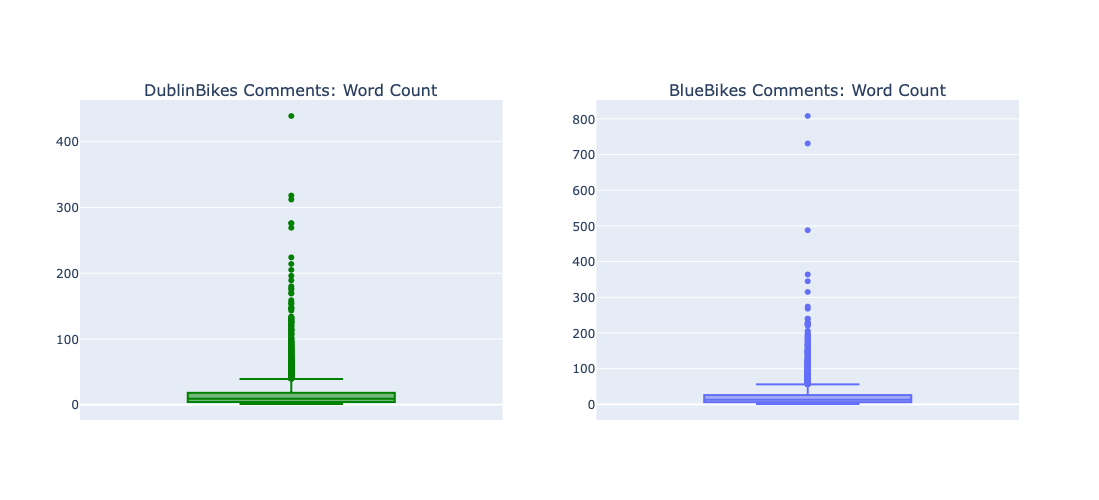

In [144]:
# Making subplots and plotting. 

fig_polarity_box = make_subplots(rows=1, cols=2, subplot_titles=('DublinBikes Comments: Word Count', 'BlueBikes Comments: Word Count'))
 

dublin_fig_polarity_box = px.box(df_dublin_comments, 
                                 y="word_count", 
                                 title="Box Plot: Polarity for DublinBikes", 
                                 color_discrete_sequence=['green'])

for trace in dublin_fig_polarity_box['data']:
    fig_polarity_box.add_trace(trace, row=1, col=1)

boston_fig_polarity_box = px.box(df_boston_comments, 
                                 y="word_count", 
                                 title="Box Plot: of Polarity for BlueBikes Boston")

for trace in boston_fig_polarity_box['data']:
    fig_polarity_box.add_trace(trace, row=1, col=2)

fig_polarity_box.update_layout(height=500, width=1000, showlegend=False)
fig_polarity_box.show()


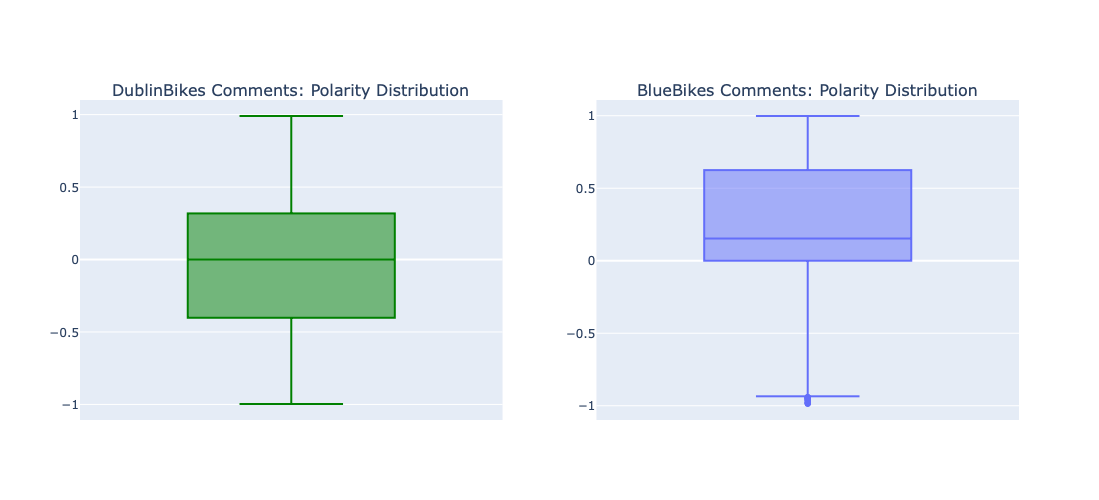

In [145]:
# Making subplots and plotting. 

fig_polarity_box = make_subplots(rows=1, cols=2, subplot_titles=('DublinBikes Comments: Polarity Distribution', 'BlueBikes Comments: Polarity Distribution'))
 

dublin_fig_polarity_box = px.box(df_dublin_comments, 
                                 y="comment_polarity", 
                                 title="Box Plot: Polarity for DublinBikes", 
                                 color_discrete_sequence=['green'])

for trace in dublin_fig_polarity_box['data']:
    fig_polarity_box.add_trace(trace, row=1, col=1)

boston_fig_polarity_box = px.box(df_boston_comments, 
                                 y="comment_polarity", 
                                 title="Box Plot: of Polarity for BlueBikes Boston")

for trace in boston_fig_polarity_box['data']:
    fig_polarity_box.add_trace(trace, row=1, col=2)

fig_polarity_box.update_layout(height=500, width=1000, showlegend=False)
fig_polarity_box.show()


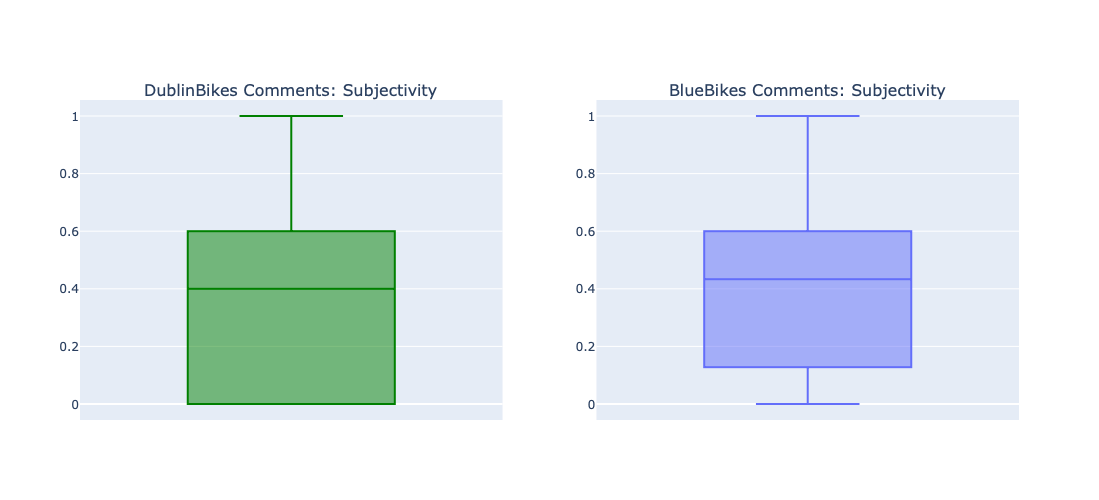

In [146]:
# Making subplots and plotting. 

fig_polarity_box = make_subplots(rows=1, cols=2, subplot_titles=('DublinBikes Comments: Subjectivity', 'BlueBikes Comments: Subjectivity'))
 

dublin_fig_polarity_box = px.box(df_dublin_comments, 
                                 y="comment_subjectivity", 
                                 title="Box Plot: Polarity for DublinBikes", 
                                 color_discrete_sequence=['green'])

for trace in dublin_fig_polarity_box['data']:
    fig_polarity_box.add_trace(trace, row=1, col=1)

boston_fig_polarity_box = px.box(df_boston_comments, 
                                 y="comment_subjectivity", 
                                 title="Box Plot: of Polarity for BlueBikes Boston")

for trace in boston_fig_polarity_box['data']:
    fig_polarity_box.add_trace(trace, row=1, col=2)

fig_polarity_box.update_layout(height=500, width=1000, showlegend=False)
fig_polarity_box.show()


#### Calculating the Correlation Between Variables

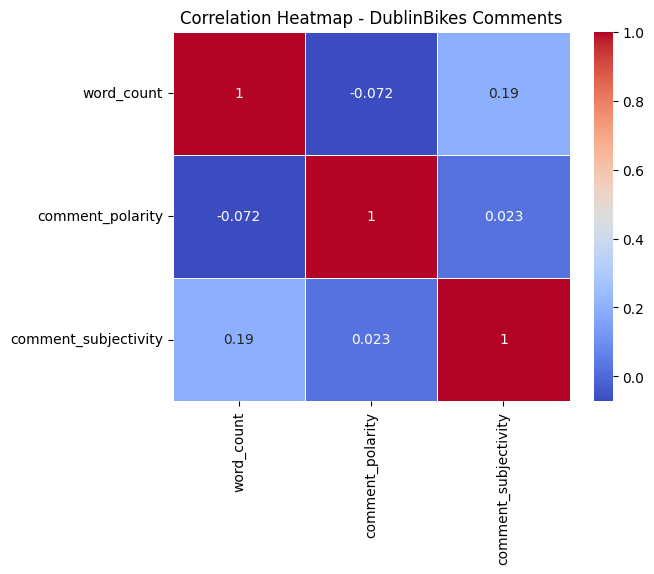

DublinBikes Corr: 
                       word_count  comment_polarity  comment_subjectivity
word_count              1.000000         -0.072097              0.194732
comment_polarity       -0.072097          1.000000              0.022515
comment_subjectivity    0.194732          0.022515              1.000000


In [147]:
dublin_comments_corr =df_dublin_comments[['word_count', 'comment_polarity', 'comment_subjectivity']].corr()
boston_comments_corr = df_boston_comments[['word_count', 'comment_polarity', 'comment_subjectivity']].corr()

# Subplot for correlation between variables in both datasets.

sns.heatmap(dublin_comments_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - DublinBikes Comments')
plt.show()

print('DublinBikes Corr: \n', dublin_comments_corr)

##### Conclusion: 

- Word Count and Comment Polarity (-0.0721): Very weak negative correlation between varibles, which means that length does not significatly affect the sentiment of comments.
- Word Count and Comment Subjectivity (0.1947): Positive but very weak correlation. In this dataset, longer comments tend to be more subjective. That may suggest that the more people write, the more subjective their comments tend to be.
- Comment Polarity and Comment Subjectivity (0.0225): Very close to zero. This correlation suggests that the sentiment of a comment does not affect their subjectivity.

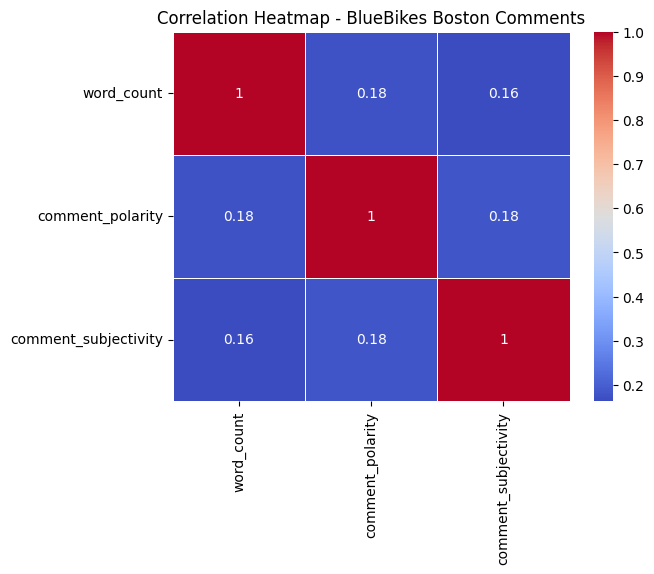

BlueBikes Boston Corr: 
                       word_count  comment_polarity  comment_subjectivity
word_count              1.000000          0.175438              0.162890
comment_polarity        0.175438          1.000000              0.179645
comment_subjectivity    0.162890          0.179645              1.000000


In [148]:
sns.heatmap(boston_comments_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - BlueBikes Boston Comments')
plt.show()

print('BlueBikes Boston Corr: \n', boston_comments_corr)

##### Conclusion: 

There is a weak positive correlation between variables, which means that longer comments have a slight tendency to be more positive.

- Word Count and Comment Polarity (0.1754): The Correlation is positive but weak. The results suggest that longer comments tend to be slight more positive. That means that users tend to be more inclined to write slight more positive comments the more they write.
- Word Count and Comment Subjectivity (0.1629): The correlation is also positive but weak. As the previous analysis, the results suggest that longer comments tend to be more subjective.
- Comment Polarity and Comment Subjectivity (0.1796): The Correlation is positive but weak. There is a slight tendency that more positive comments tend to express more subjective features.